In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA

import csv

# Loading the Data:
---

In [2]:
# checking the sizes of each of the different files to determine which one is the largest/the one I should use.
import os
directory = '/mnt/usb/cmdunham'
for filename in os.listdir(directory):
    if 'meta' in filename:
        file_path = os.path.join(directory, filename)
        data = pd.read_feather(file_path)
        file = filename.split('.')[0]
        print(f'There are {data.shape[0]:,} samples in the {file} files.')

There are 60,489 samples in the MES_JP8_ims_acbc_train_v1 files.
There are 282,508 samples in the BKG_DMMP_ims_acbc_train_v1 files.
There are 599,528 samples in the BKG_SIM_ims_acbc_train_v1 files.


In [ ]:
filename = '/mnt/usb/cmdunham/BKG_SIM_ims_acbc_train_v1.1.09_meta.feather'
metadata = pd.read_feather(filename)

filename = '/mnt/usb/cmdunham/BKG_SIM_ims_acbc_train_v1.1.09_spectra.feather'
spectra = pd.read_feather(filename)

The 'level_0' column of the metadata dataframe can be matched with the 'index' column of the spectra dataframe to identify metadata for each sample.

In [45]:
metadata.tail()

,level_0,index,Filename,TemperatureKelvin,PressureBar,PosPeak1Mobility,PosPeak2Mobility,PosPeak3Mobility,PosPeak1Amplitude,PosPeak2Amplitude,PosPeak3Amplitude,NegPeak1Mobility,NegPeak2Mobility,NegPeak3Mobility,NegPeak1Amplitude,NegPeak2Amplitude,NegPeak3Amplitude,Label
599523,849240,631079,IMSJLW16366_20200122_LAB_TEPO_Cleardown_BSI.txt,302.319993,1027.000015,2.335672,1.435798,1.006633,7617.969238,43.375000,18.000,2.179112,1.339173,0.581894,5914.000977,14.25,14.000000,TEPO
599524,849241,631080,IMSJLW16366_20200122_LAB_TEPO_Cleardown_BSI.txt,302.319993,1027.300015,2.335634,1.431873,1.925018,7649.572754,53.125000,12.000,2.178783,1.159771,0.517489,6005.080078,10.00,10.000000,TEPO
599525,849242,631081,IMSJLW16366_20200122_LAB_TEPO_Cleardown_BSI.txt,302.319993,1026.800015,2.336006,1.427653,1.140053,7620.319824,62.250000,17.125,2.179229,1.770375,1.172329,5842.084473,12.00,11.000000,TEPO
599526,849243,631082,IMSJLW16366_20200122_LAB_TEPO_Cleardown_BSI.txt,302.319993,1026.800015,2.336124,1.432291,0.591532,7596.130371,61.125000,17.000,2.179803,1.515520,1.199474,6015.358398,16.00,13.041666,TEPO
599527,849245,631084,IMSJLW16366_20200122_LAB_TEPO_Cleardown_BSI.txt,302.319993,1026.800015,2.338207,1.427897,3.735121,7646.540039,63.041664,10.125,2.180987,1.621558,1.155449,6012.032227,18.25,16.000000,TEPO


In [7]:
for col in metadata.columns:
    print(col, ':', type(col))

level_0 : <class 'str'>
index : <class 'str'>
Filename : <class 'str'>
TemperatureKelvin : <class 'str'>
PressureBar : <class 'str'>
PosPeak1Mobility : <class 'str'>
PosPeak2Mobility : <class 'str'>
PosPeak3Mobility : <class 'str'>
PosPeak1Amplitude : <class 'str'>
PosPeak2Amplitude : <class 'str'>
PosPeak3Amplitude : <class 'str'>
NegPeak1Mobility : <class 'str'>
NegPeak2Mobility : <class 'str'>
NegPeak3Mobility : <class 'str'>
NegPeak1Amplitude : <class 'str'>
NegPeak2Amplitude : <class 'str'>
NegPeak3Amplitude : <class 'str'>
Label : <class 'str'>


In [6]:
spectra.head()

,index,p_184,p_185,p_186,p_187,p_188,p_189,p_190,p_191,p_192,...,n_1013,n_1014,n_1015,n_1016,n_1017,n_1018,n_1019,n_1020,n_1021,Label
0,1427,92.0,94.0,98.0,101.0,106.0,110.0,117.0,121.0,127.0,...,-11.0,-11.0,-11.0,-8.0,-8.0,-7.0,-7.0,-7.0,-7.0,BKG
1,1452,85.0,87.0,92.0,98.0,103.0,110.0,116.0,123.0,127.0,...,-13.0,-14.0,-17.0,-18.0,-19.0,-20.0,-17.0,-17.0,-17.0,BKG
2,1467,86.0,91.0,97.0,103.0,109.0,115.0,120.0,125.0,130.0,...,-18.0,-18.0,-22.0,-22.0,-24.0,-23.0,-23.0,-23.0,-21.0,BKG
3,1486,97.0,98.0,102.0,104.0,107.0,110.0,114.0,117.0,121.0,...,-27.0,-26.0,-26.0,-22.0,-21.0,-22.0,-23.0,-23.0,-27.0,BKG
4,1564,91.0,96.0,101.0,105.0,112.0,117.0,121.0,125.0,128.0,...,-14.0,-17.0,-18.0,-21.0,-21.0,-19.0,-18.0,-17.0,-16.0,BKG


In [7]:
metadata.shape

(599528, 18)

In [8]:
print('Number of unique values in each field:')
print('   Label: ', len(set(metadata['Label'])))
print('   PressureBar: ', len(set(metadata['PressureBar'])))
print('   TemperatureKelvin: ', len(set(metadata['TemperatureKelvin'])))

Number of unique values in each field:
   Label:  9
   PressureBar:  798
   TemperatureKelvin:  667


In [9]:
unique_labels = metadata['Label'].unique()
print(f'There are {len(unique_labels)} unique labels in the metadata DataFrame.')
print('----------------------------------------------------')
labels_counts = metadata['Label'].value_counts()
for label in labels_counts.index:
  print(f'There are {labels_counts[label]:,} samples for the {label} label.')

There are 9 unique labels in the metadata DataFrame.
----------------------------------------------------
There are 228,663 samples for the BKG label.
There are 132,517 samples for the TEPO label.
There are 53,845 samples for the DMMP label.
There are 51,545 samples for the MES label.
There are 51,533 samples for the DEM label.
There are 30,514 samples for the DEB label.
There are 22,404 samples for the DtBP label.
There are 19,563 samples for the DPM label.
There are 8,944 samples for the JP8 label.


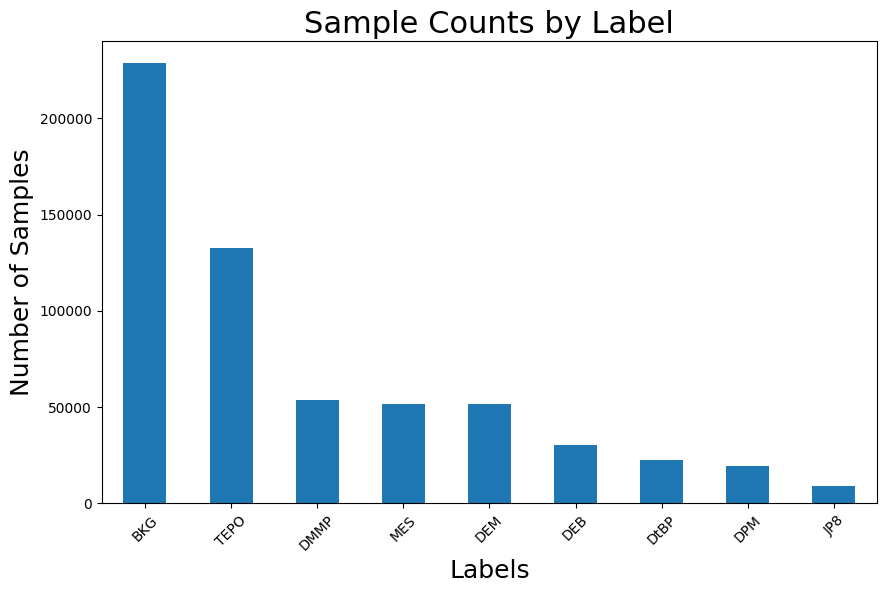

In [10]:
plt.figure(figsize=(10, 6)) 
labels_counts.plot(kind='bar')

plt.title('Sample Counts by Label', fontsize=22)
plt.xlabel('Labels', fontsize=18)
plt.ylabel('Number of Samples', fontsize=18)
plt.xticks(rotation=45)  

plt.show()

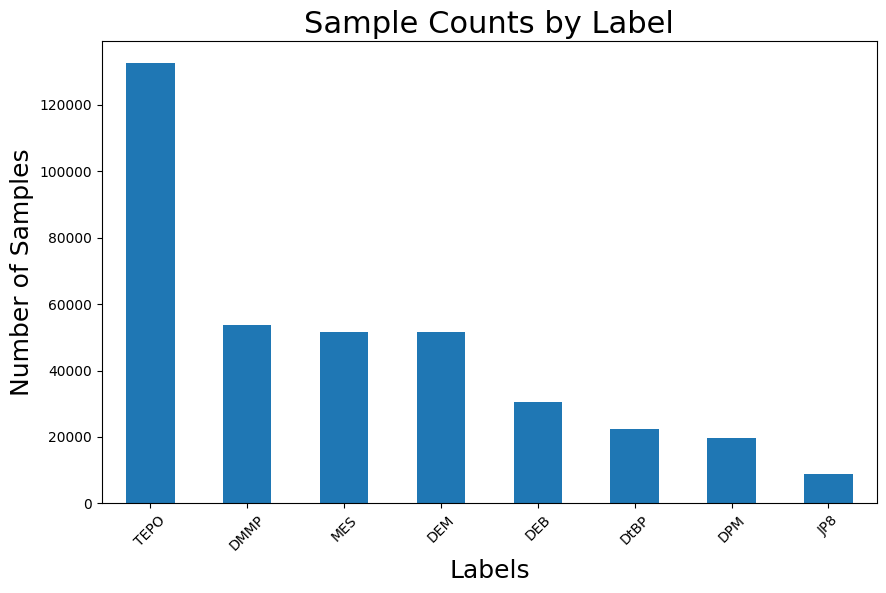

In [11]:
plt.figure(figsize=(10, 6)) 
simulant_counts = labels_counts[labels_counts.index != 'BKG']
simulant_counts.plot(kind='bar')

plt.title('Sample Counts by Label', fontsize=22)
plt.xlabel('Labels', fontsize=18)
plt.ylabel('Number of Samples', fontsize=18)
plt.xticks(rotation=45)  

plt.show()

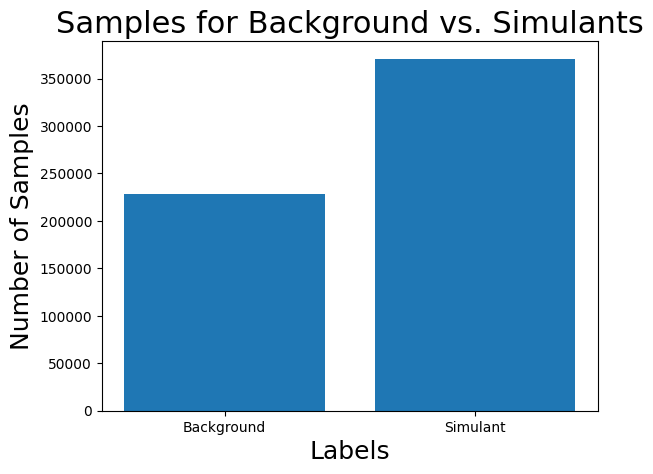

In [12]:
bkg_count = labels_counts.get('BKG', 0)
plt.bar(['Background', 'Simulant'], [bkg_count, simulant_counts.sum()])

plt.title('Samples for Background vs. Simulants', fontsize=22)
plt.xlabel('Labels', fontsize=18)
plt.ylabel('Number of Samples', fontsize=18)
plt.show()

In [13]:
metadata.isna().sum()

level_0               0
index                 0
Filename              0
TemperatureKelvin    13
PressureBar           0
PosPeak1Mobility      0
PosPeak2Mobility      0
PosPeak3Mobility      0
PosPeak1Amplitude     0
PosPeak2Amplitude     0
PosPeak3Amplitude     0
NegPeak1Mobility      0
NegPeak2Mobility      0
NegPeak3Mobility      0
NegPeak1Amplitude     0
NegPeak2Amplitude     0
NegPeak3Amplitude     0
Label                 0
dtype: int64

In [14]:
# # dropping the 13 rows with NaN values in "TemperatureKelvin" field.
# metadata = metadata.dropna(subset='TemperatureKelvin')

# Plotting variation within numeric features:
---

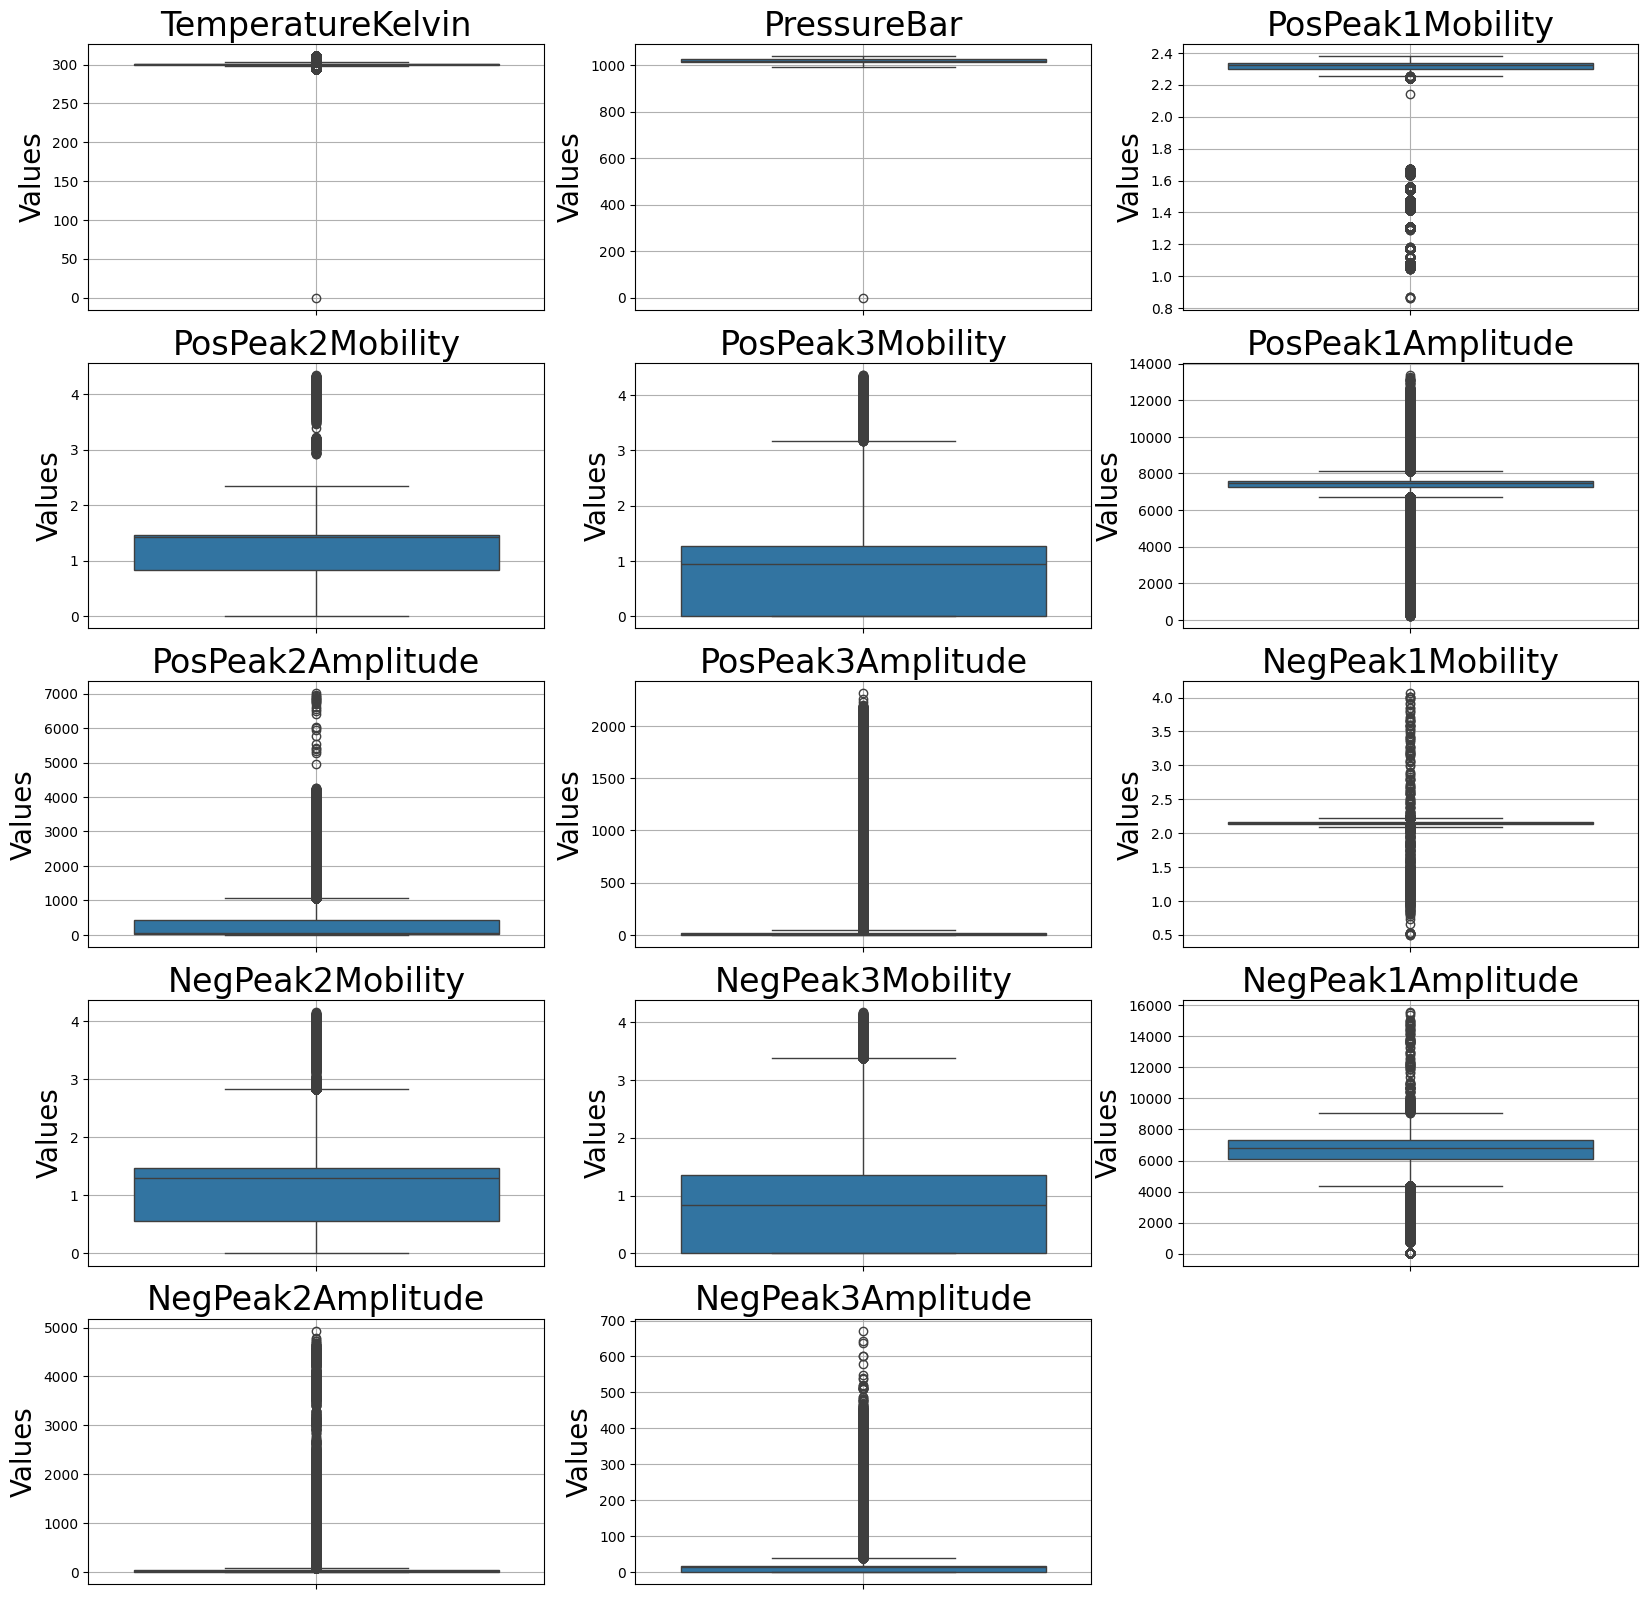

In [15]:
numeric_features = [col for col in metadata.columns if metadata[col].dtype == np.float64]
num_features = len(numeric_features)
cols = 3  # Number of columns for the subplots
rows = (num_features + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(ax=axes[i], y=metadata[feature])
    axes[i].set_title(feature,fontsize=24)
    axes[i].set_ylabel('Values', fontsize=20)
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

In the boxplots above we can see that "TemperatureKelvin" and "PressureBar" fields have significant outliers. I'll drop those samples.

In [16]:
# removing outliers from two fields
metadata_cleaned = metadata[metadata["TemperatureKelvin"] > 0]
metadata_cleaned = metadata_cleaned[metadata_cleaned["PressureBar"] > 0]
print(f'Dropping outliers from "TemperatureKelvin" and "PressureBar" removed {metadata.shape[0] - metadata_cleaned.shape[0]} rows from the dataset.') 

Dropping outliers from "TemperatureKelvin" and "PressureBar" removed 14 rows from the dataset.


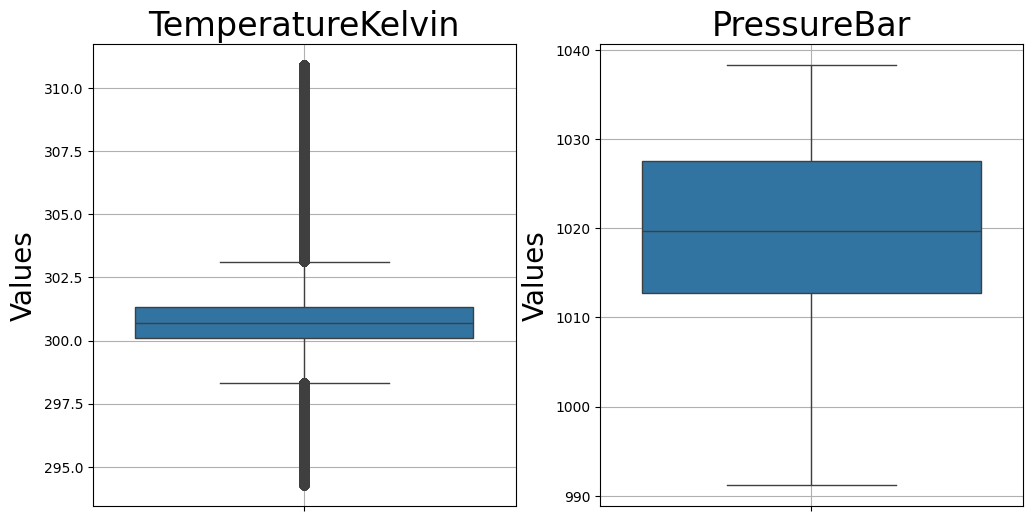

In [17]:
features = ['TemperatureKelvin', 'PressureBar']
cols = len(features)  # Number of columns for the subplots
fig, axes = plt.subplots(1, cols, figsize=(12, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(ax=axes[i], y=metadata_cleaned[feature])
    axes[i].set_title(feature,fontsize=24)
    axes[i].set_ylabel('Values', fontsize=20)
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

The boxplots for these features no longer show significant outliers.

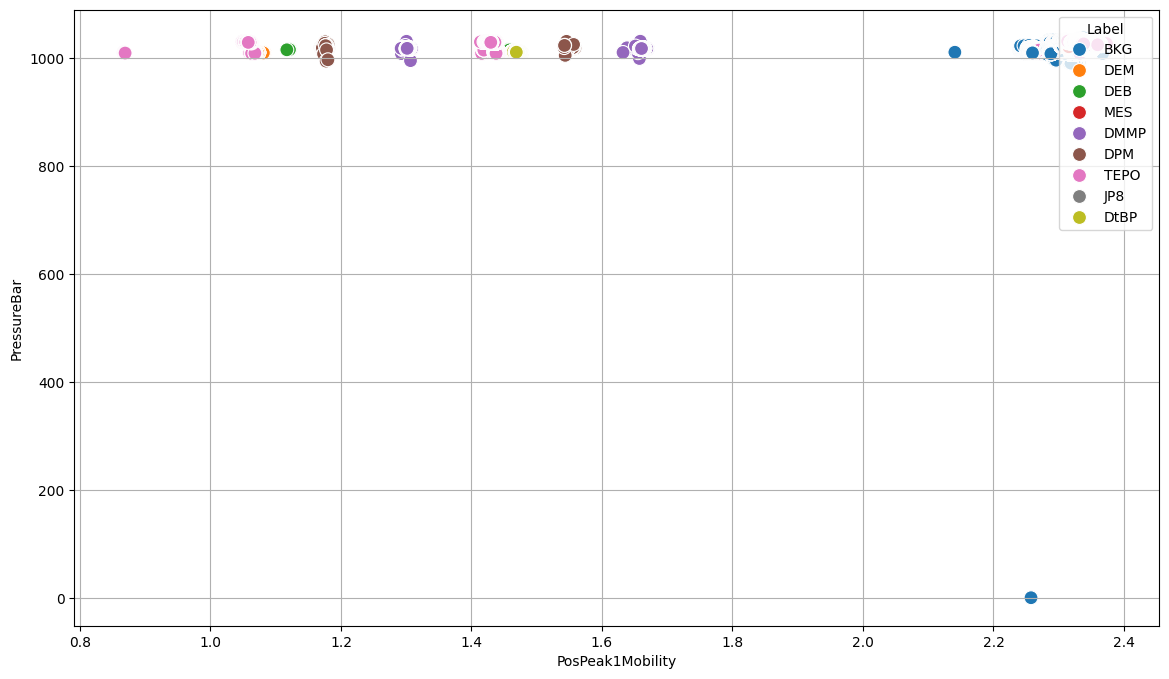

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plot only a section of the df if a plot of the entire thing is difficult to interpret
# slice_num = 300
# sns.scatterplot(data=metadata[:][:slice_num], x='PosPeak1Mobility', y='Label', hue='Label', legend="brief", ax=ax, s=100)

# sns.scatterplot(data=metadata, x='PosPeak1Mobility', y='Label', hue='Label', legend="brief", ax=ax, s=100)
sns.scatterplot(data=metadata, x='PosPeak1Mobility', y='PressureBar', hue='Label', legend="brief", ax=ax, s=100)
sns.move_legend(ax, 'upper right')

# plt.xticks([])
# plt.xlabel('Collision Cross Section Average', fontsize=16)
# plt.ylabel('Molecular Formula', fontsize=16)
# plt.title('CCS Average Values Across Molecules', fontsize=20)
plt.grid()
plt.show()

## Plot samples across features:
---
Trying to determine which features best group samples by label.

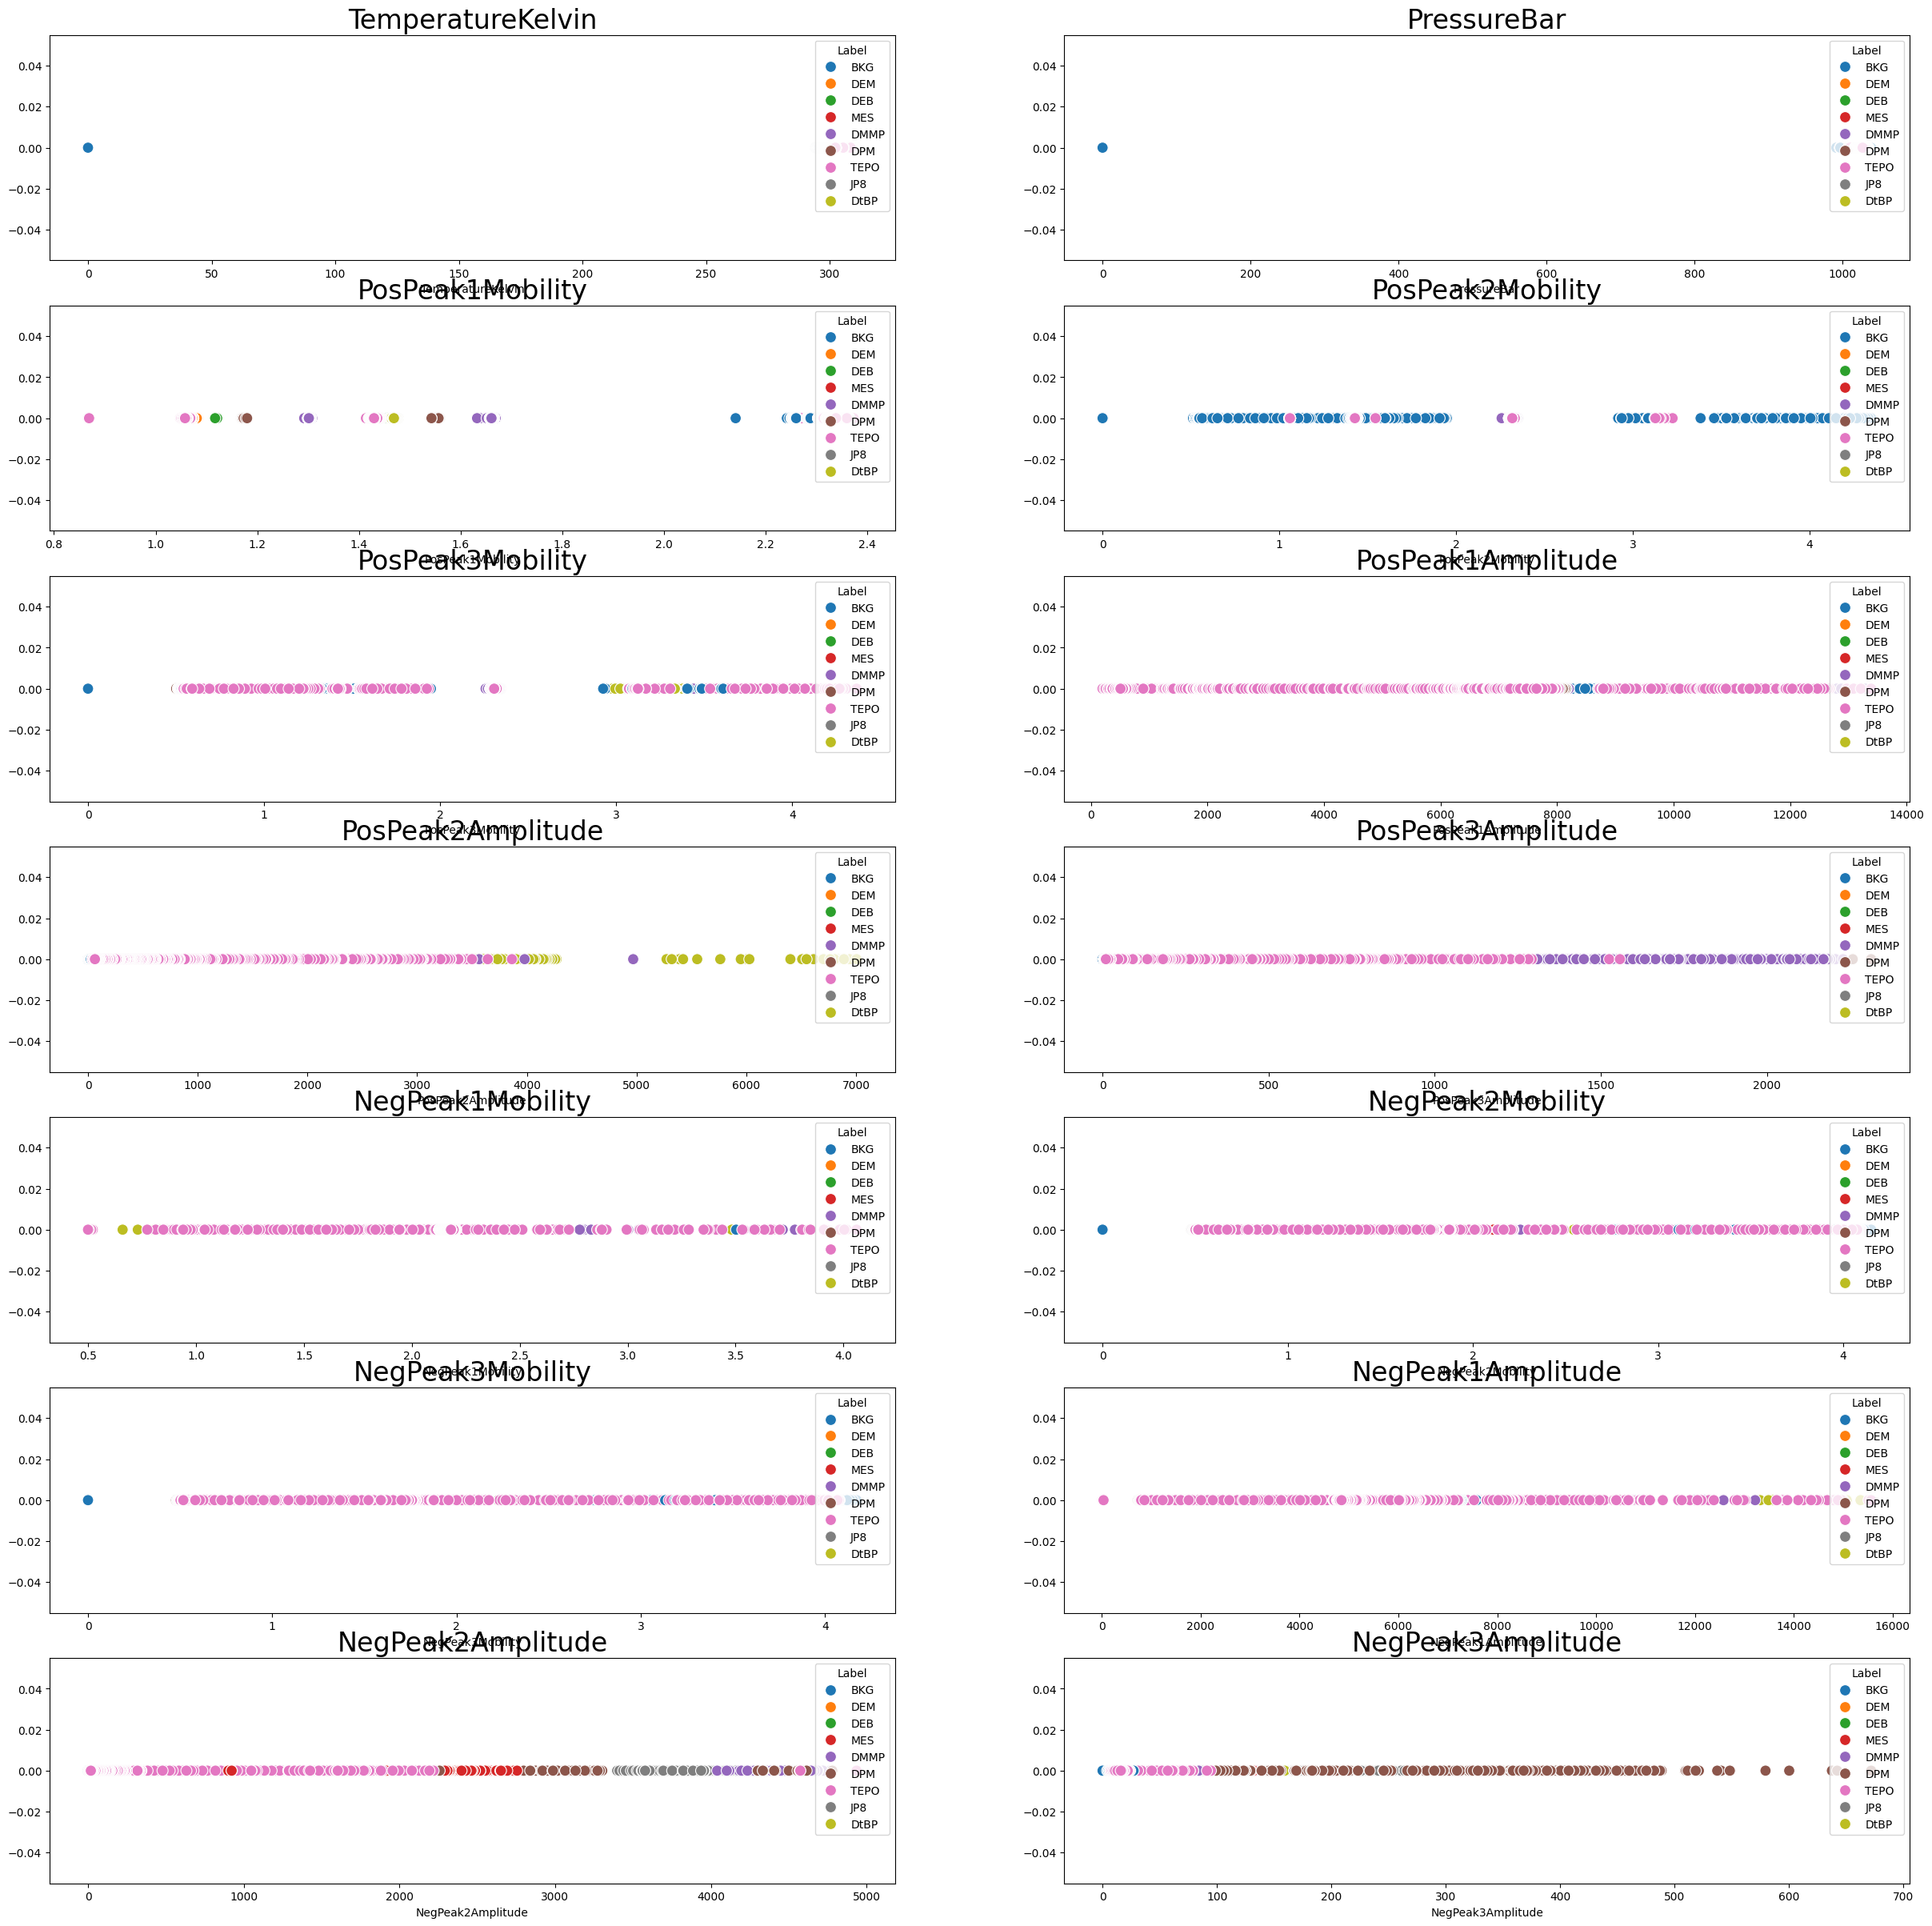

In [19]:
numeric_features = [col for col in metadata.columns if metadata[col].dtype == np.float64]
num_features = len(numeric_features)
cols = 2  # Number of columns for the subplots
rows = (num_features + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(30, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# create y_values as list of 0s 
y_values = [0] * len(metadata)

for i, feature in enumerate(numeric_features):
    sns.scatterplot(ax=axes[i], data=metadata, x=feature, y=y_values, hue='Label', s=100, legend="brief")
    sns.move_legend(axes[i], 'upper right')
    axes[i].set_title(feature,fontsize=24)
    # break
    # plt.legend(loc='upper right')
    # break
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Plotting IMS Spectra:
---

I'm curious to see what the average ion intensity is at each drift time. Plotting that below. I'm also curious how averages differ between background and simulant spectra. 

In [4]:
ims_spectra_data = spectra.drop(columns=['index', 'Label'])

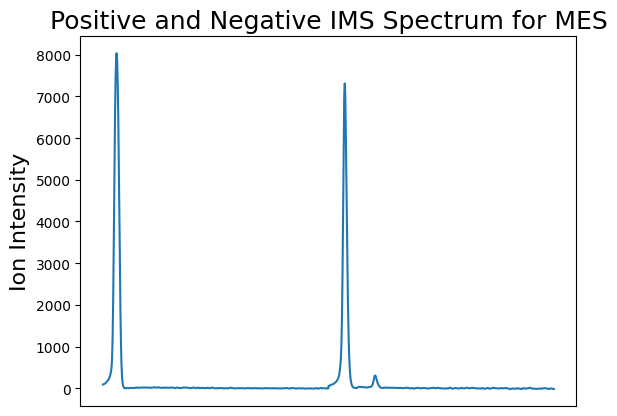

In [ ]:
plot_chem_idx  = 50000
spectrum_to_plot = ims_spectra_data.iloc[plot_chem_idx:plot_chem_idx+1,:].T
plotting_chem_name = list(spectra['Label'])[plot_chem_idx]

# # Define the x-axis range, 184 is the lowest drift time
numbers = list(range(184, (len(spectrum_to_plot)+184)))

plt.plot(numbers, spectrum_to_plot, label='Positive')
plt.title(f'Positive and Negative IMS Spectrum for {plotting_chem_name}', fontsize=18)
plt.ylabel('Ion Intensity', fontsize=16)
plt.xticks([])

plt.show()

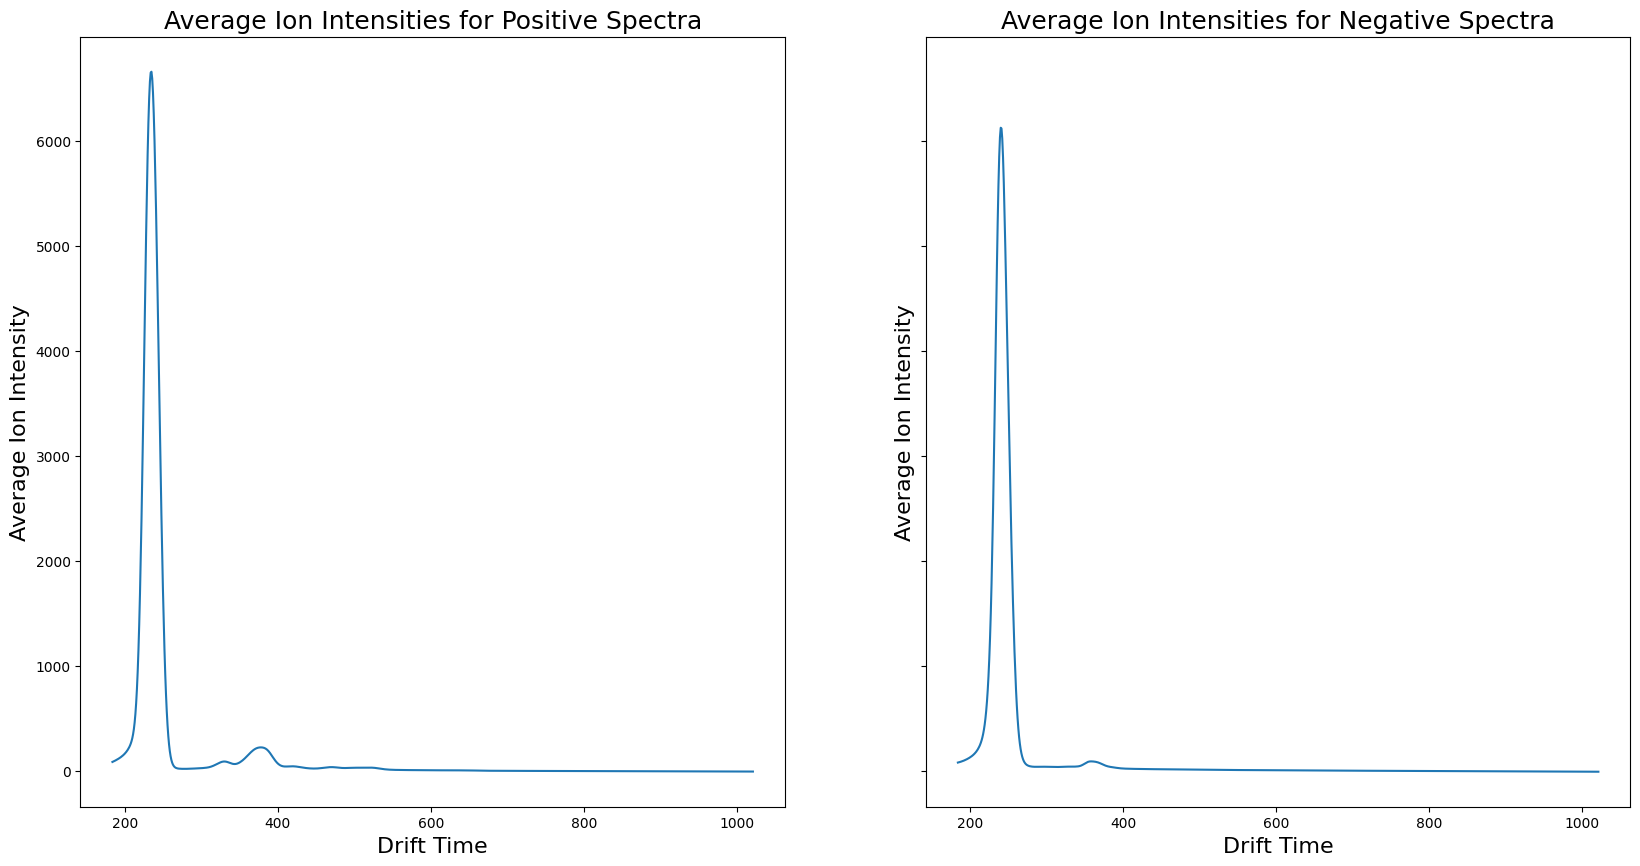

In [ ]:
averages = ims_spectra_data.mean()

# # Define the x-axis range, 184 is the lowest drift time
numbers = range(184, (len(averages)//2)+184)

_, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20, 10))

ax[0].plot(numbers, averages[:len(numbers)], label='Positive')
ax[0].set_title(f'Average Ion Intensities for Positive Spectra', fontsize=18)
ax[0].set_xlabel('Drift Time', fontsize=16)
ax[0].set_ylabel('Average Ion Intensity', fontsize=16)

ax[1].plot(numbers, averages[len(numbers):], label='Negative')
ax[1].set_title(f'Average Ion Intensities for Negative Spectra', fontsize=18)
ax[1].set_xlabel('Drift Time', fontsize=16)
ax[1].set_ylabel('Average Ion Intensity', fontsize=16)
plt.show()

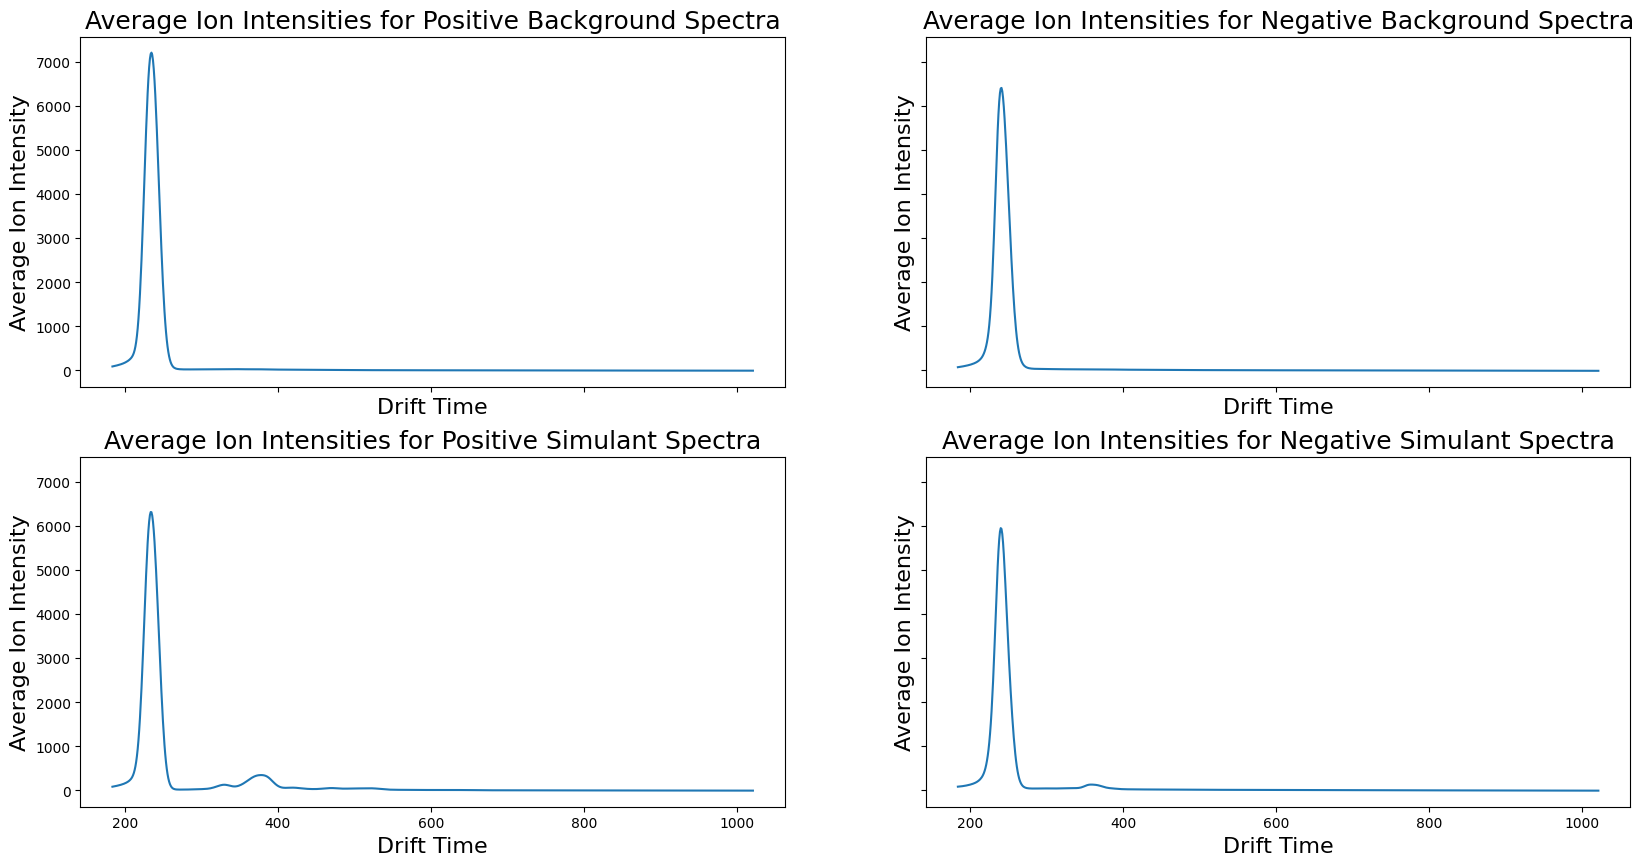

In [53]:
bkg = spectra[spectra['Label'] == 'BKG']
bkg_spectra = bkg.drop(columns=['index', 'Label'])
bkg_averages = bkg_spectra.mean()

simulants = spectra[spectra['Label'] != 'BKG']
simulant_spectra = simulants.drop(columns=['index', 'Label'])
simulant_averages = simulant_spectra.mean()

# # Define the x-axis range, 184 is the lowest drift time
numbers = range(184, (len(bkg_averages)//2)+184)

_, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(20, 10))
ax = ax.flatten()

ax[0].plot(numbers, bkg_averages[:len(numbers)], label='Positive')
ax[0].set_title(f'Average Ion Intensities for Positive Background Spectra', fontsize=18)
ax[0].set_xlabel('Drift Time', fontsize=16)
ax[0].set_ylabel('Average Ion Intensity', fontsize=16)

ax[1].plot(numbers, bkg_averages[len(numbers):], label='Negative')
ax[1].set_title(f'Average Ion Intensities for Negative Background Spectra', fontsize=18)
ax[1].set_xlabel('Drift Time', fontsize=16)
ax[1].set_ylabel('Average Ion Intensity', fontsize=16)

ax[2].plot(numbers, simulant_averages[:len(numbers)], label='Positive')
ax[2].set_title(f'Average Ion Intensities for Positive Simulant Spectra', fontsize=18)
ax[2].set_xlabel('Drift Time', fontsize=16)
ax[2].set_ylabel('Average Ion Intensity', fontsize=16)

ax[3].plot(numbers, simulant_averages[len(numbers):], label='Negative')
ax[3].set_title(f'Average Ion Intensities for Negative Simulant Spectra', fontsize=18)
ax[3].set_xlabel('Drift Time', fontsize=16)
ax[3].set_ylabel('Average Ion Intensity', fontsize=16)
plt.show()

I want to look at where the metadata says that the peaks are to see if I should be paying attention to the large peaks that are present in both the background and ims spectra.

In [63]:
bkg_metadata = metadata[metadata['Label'] == 'BKG']
print('Average values for background spectra:')
print("    'PosPeak1Mobility':", round(bkg_metadata['PosPeak1Mobility'].mean(),4))
print("    'PosPeak1Amplitude':", round(bkg_metadata['PosPeak1Amplitude'].mean(),4))
print("    'NegPeak1Mobility':", round(bkg_metadata['NegPeak1Mobility'].mean(),4))
print("    'NegPeak1Amplitude':", round(bkg_metadata['NegPeak1Amplitude'].mean(),4))
simulant_metadata = metadata[metadata['Label'] != 'BKG']
print('Average values for simulant spectra:')
print("    'PosPeak1Mobility':", round(simulant_metadata['PosPeak1Mobility'].mean(),4))
print("    'PosPeak1Amplitude':", round(simulant_metadata['PosPeak1Amplitude'].mean(),4))
print("    'NegPeak1Mobility':", round(simulant_metadata['NegPeak1Mobility'].mean(),4))
print("    'NegPeak1Amplitude':", round(simulant_metadata['NegPeak1Amplitude'].mean(),4))

Average values for background spectra:
    'PosPeak1Mobility': 2.3157
    'PosPeak1Amplitude': 7589.1102
    'NegPeak1Mobility': 2.1422
    'NegPeak1Amplitude': 6920.4668
Average values for simulant spectra:
    'PosPeak1Mobility': 2.2501
    'PosPeak1Amplitude': 6745.2376
    'NegPeak1Mobility': 2.1439
    'NegPeak1Amplitude': 6362.6145


In [ ]:
# Plotting spectra for a few different labels
labels = spectra['Label']

# column names are currently in the format 'p_1234' or 'n_1234'. Separating into two lists for labeling the x-axis
x_p_vals = [int(col.split('_')[1]) for col in ims_spectra_data.columns if col.split('_')[0] == 'p']
x_n_vals = [int(col.split('_')[1]) for col in ims_spectra_data.columns if col.split('_')[0] == 'n']

num_plots = 0
plotting_indices = []
chem_to_plot = 'BKG'
for idx in range(len(labels)):
    if num_plots > 10:
        break
    else:
        if labels[idx] == chem_to_plot:
            plotting_indices.append(idx)
            num_plots+=1

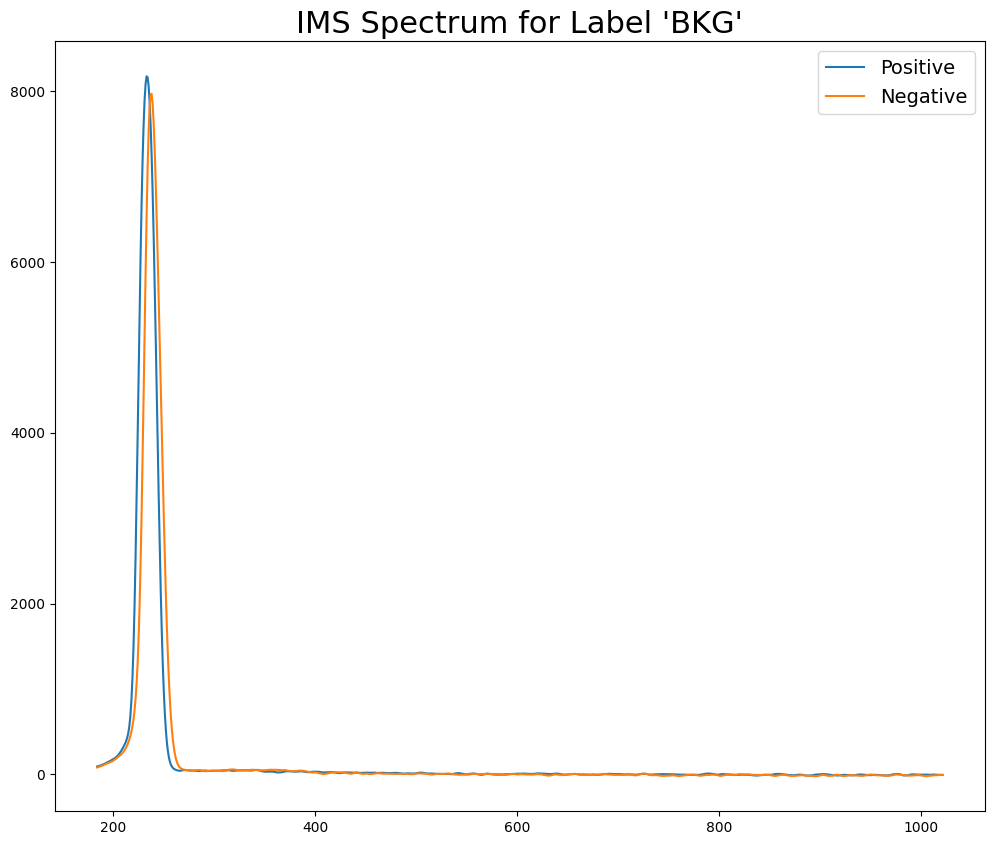

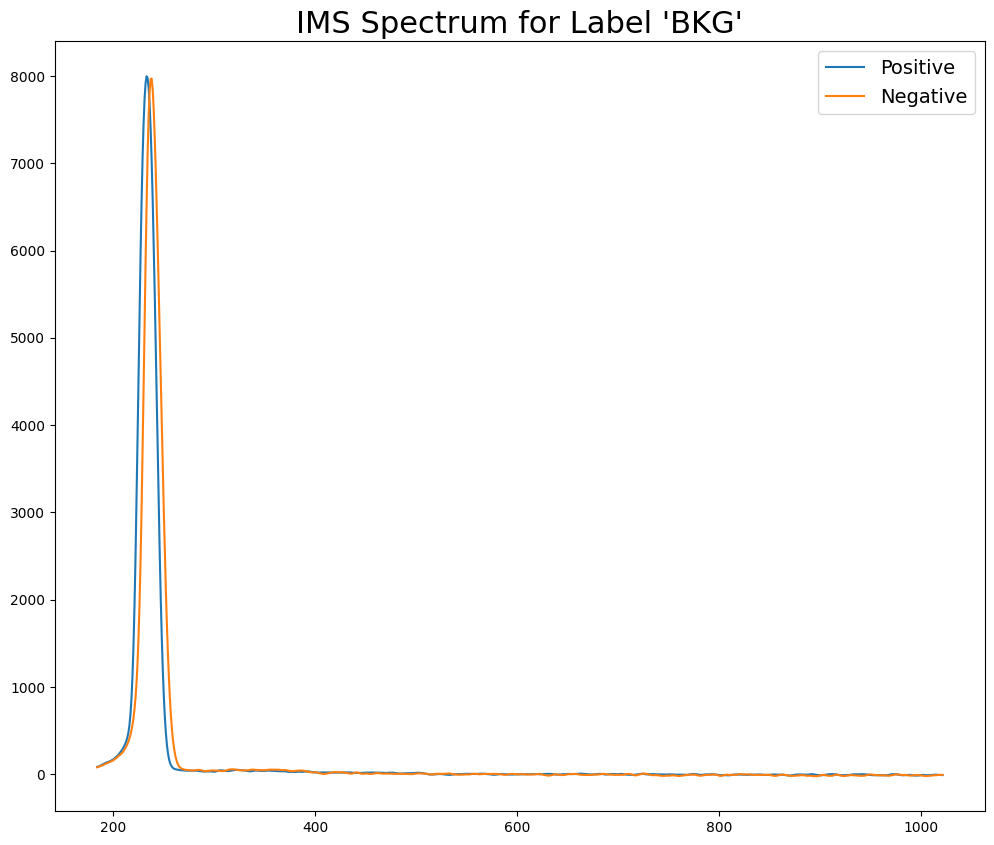

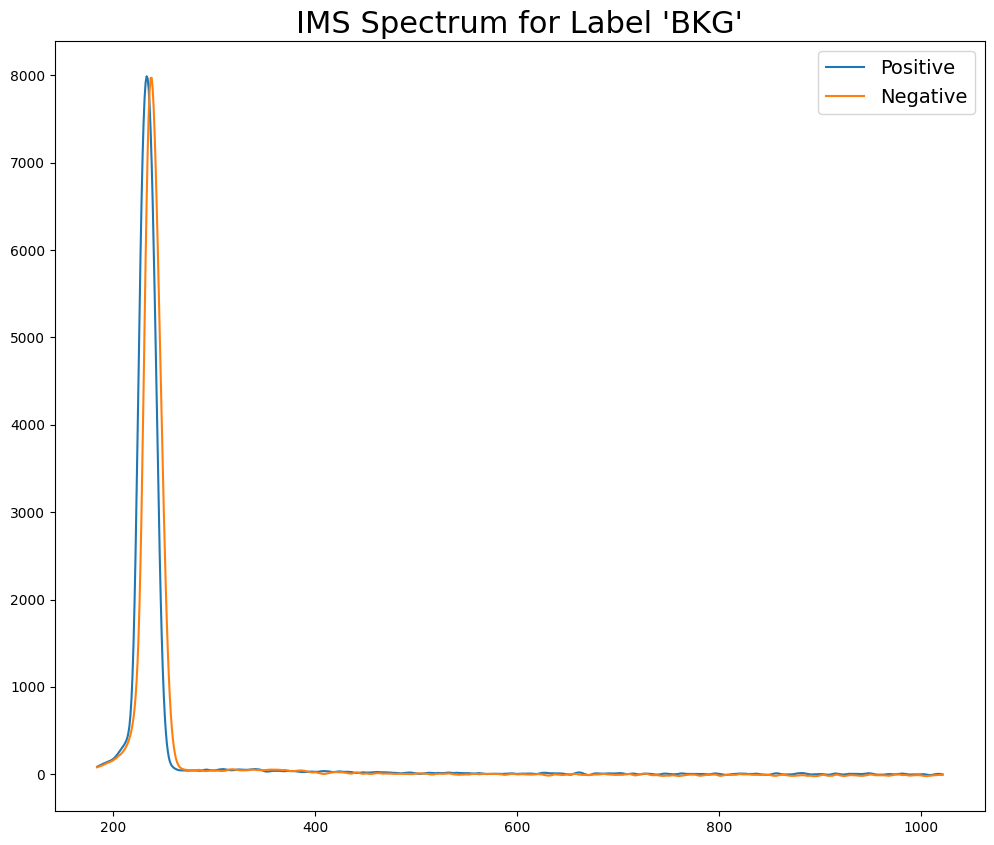

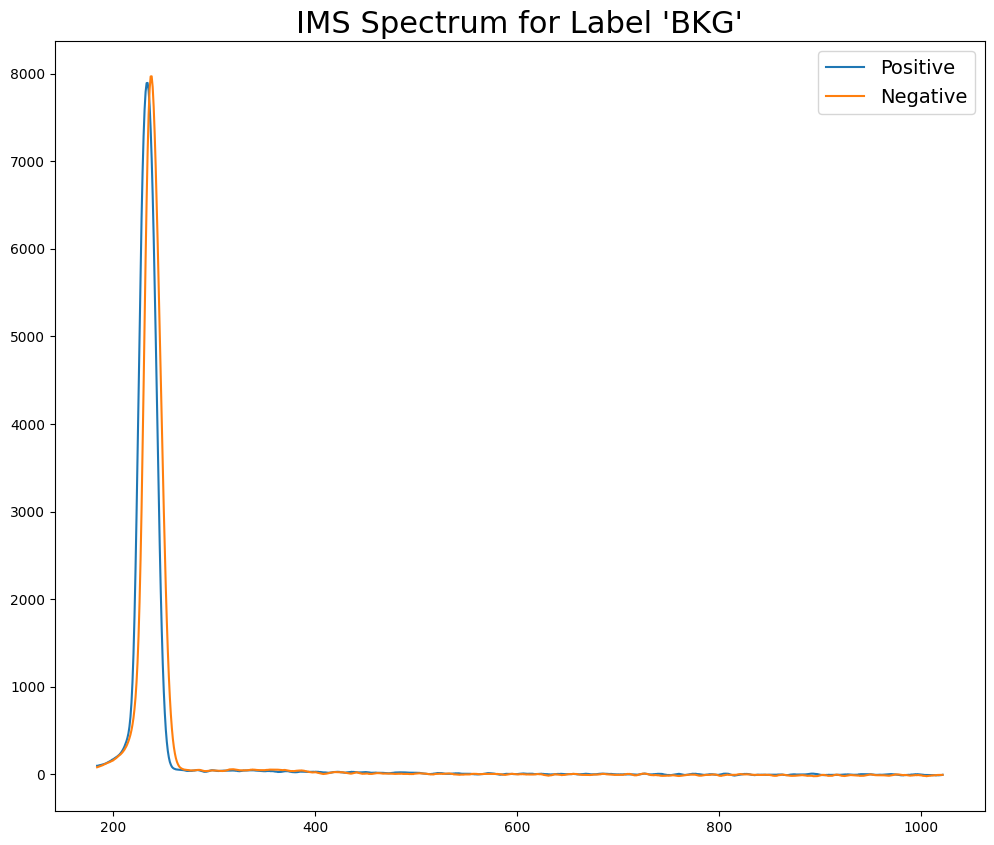

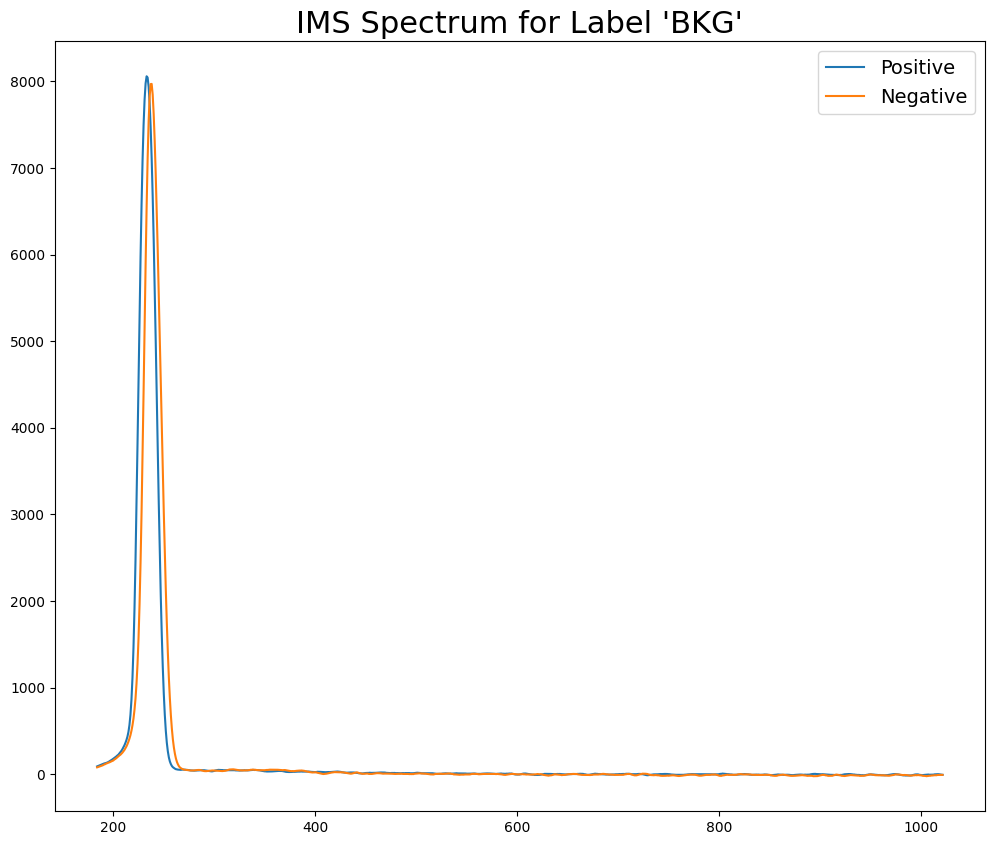

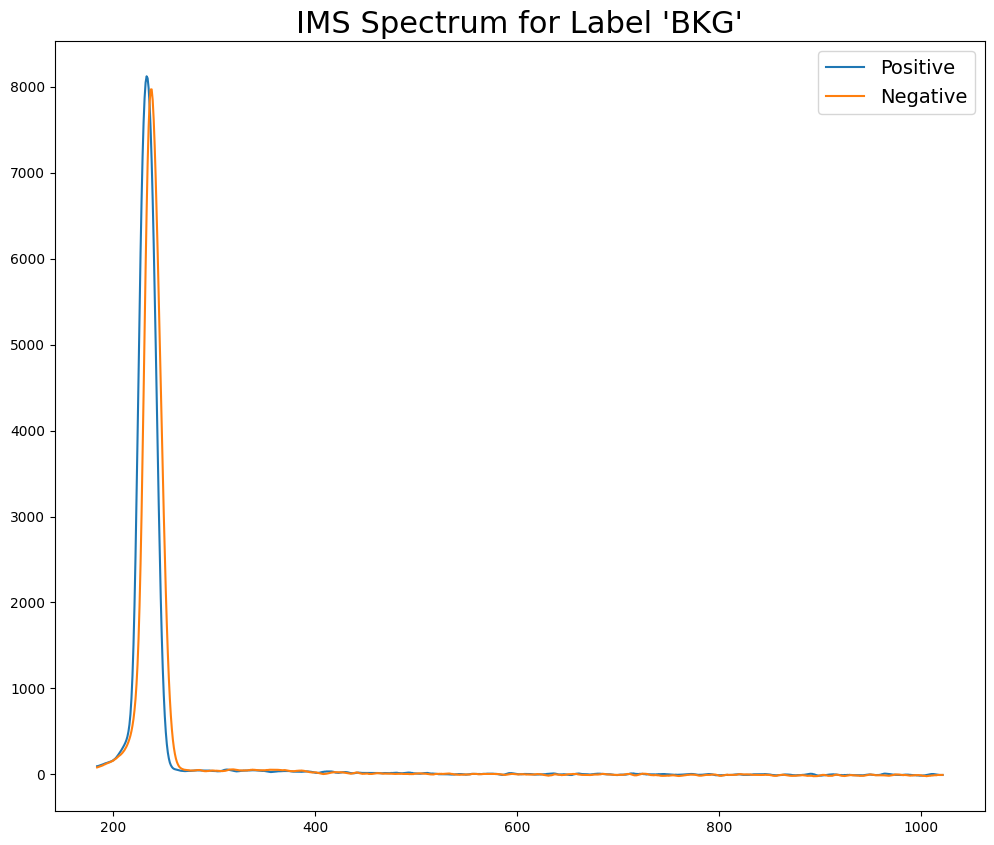

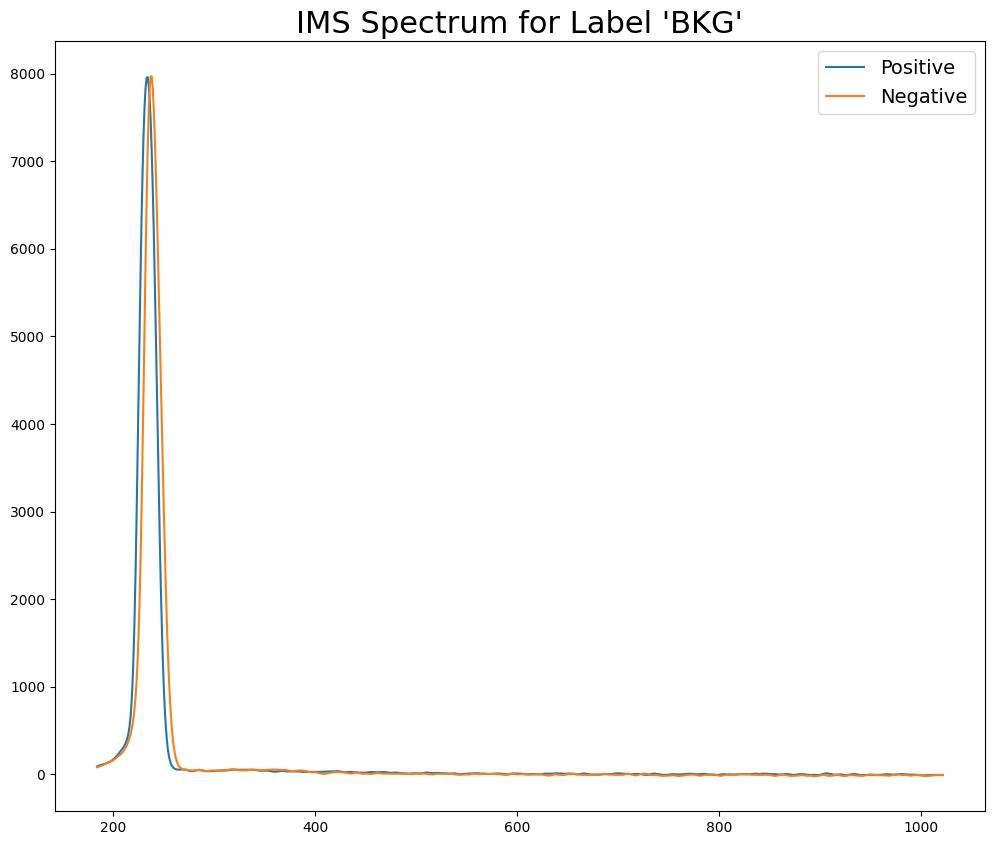

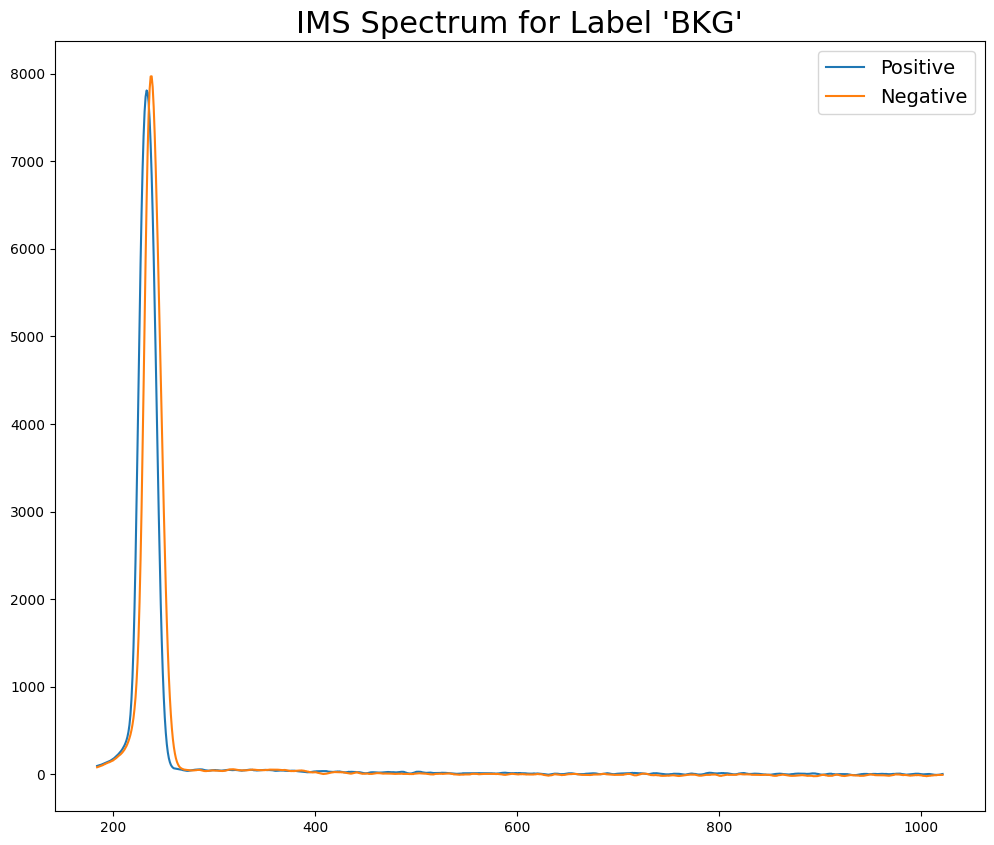

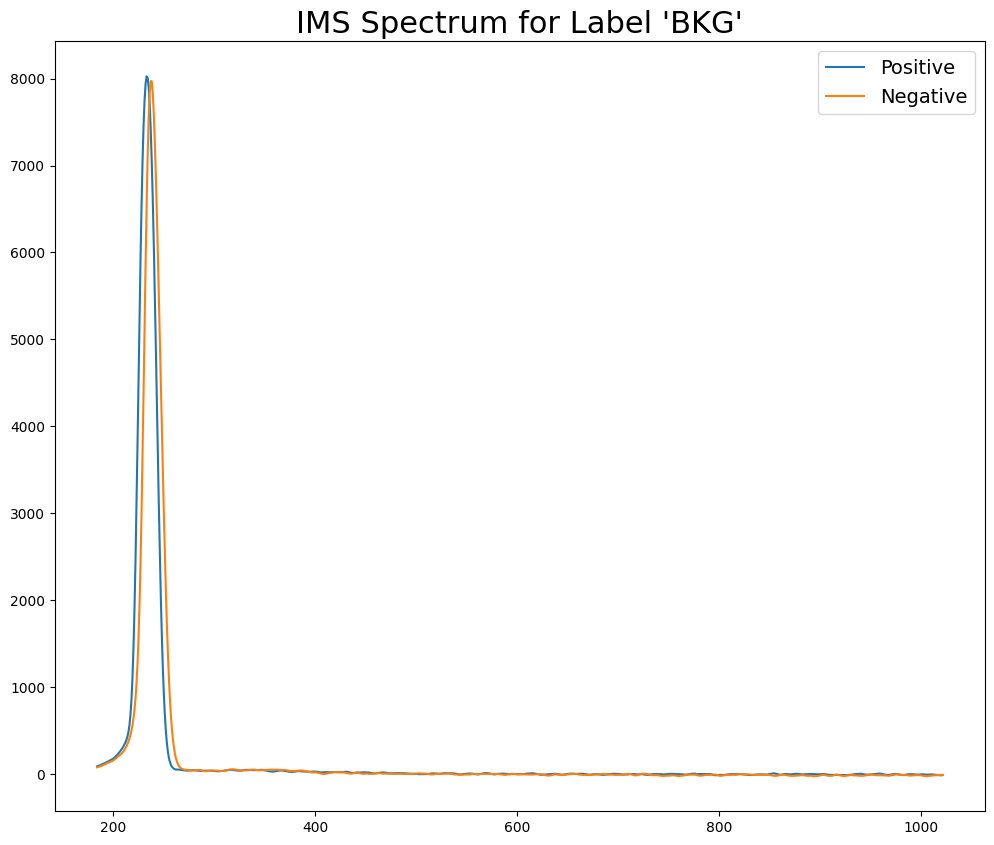

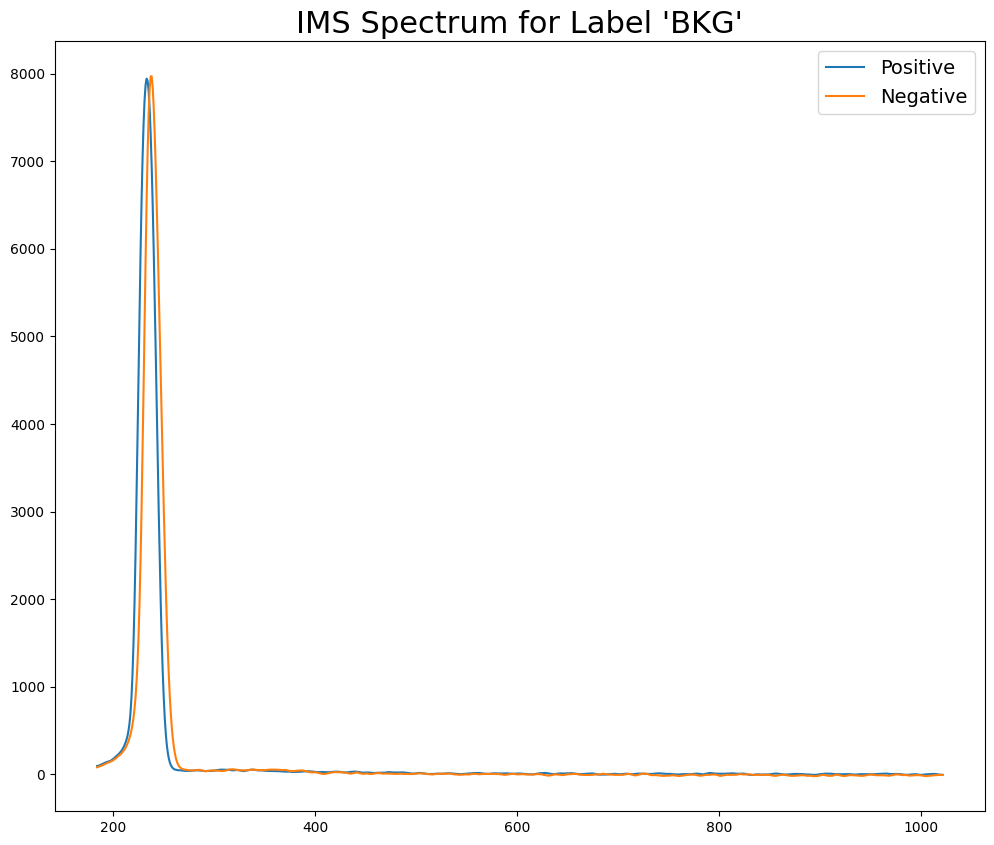

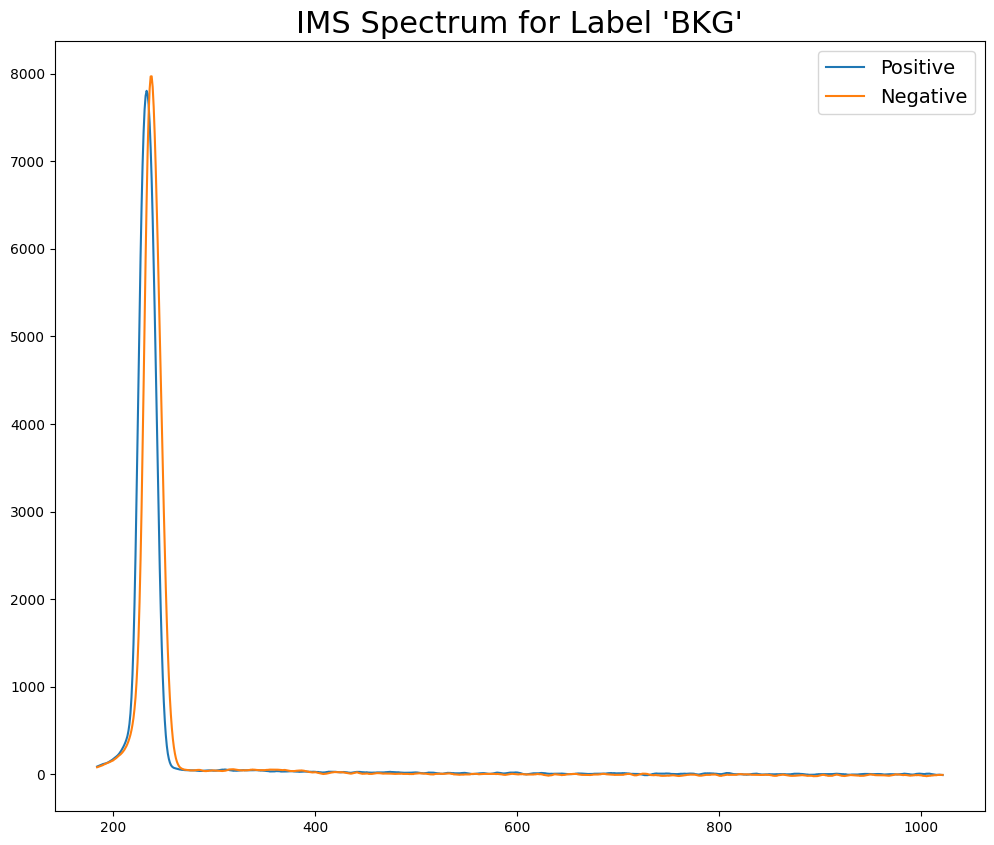

In [5]:
for idx in plotting_indices:
    plt.figure(figsize=(12, 10))
    plt.plot(x_p_vals, ims_spectra_data.iloc[idx][:len(x_p_vals)], label ='Positive')
    plt.plot(x_n_vals, ims_spectra_data.iloc[0][len(x_p_vals):], label='Negative')
    plt.title(f"IMS Spectrum for Label '{labels[idx]}'", fontsize=22)
    plt.legend(fontsize=14)
    plt.show()

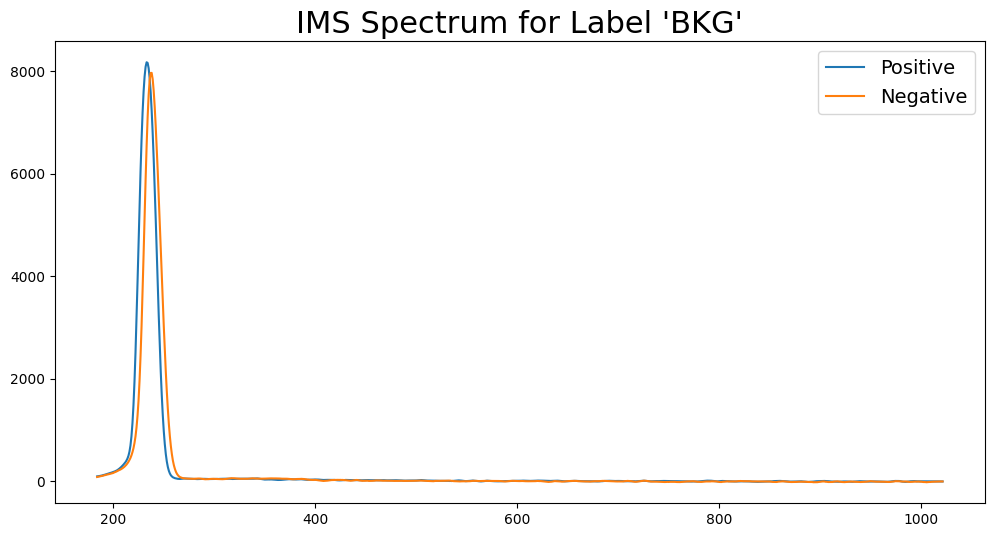

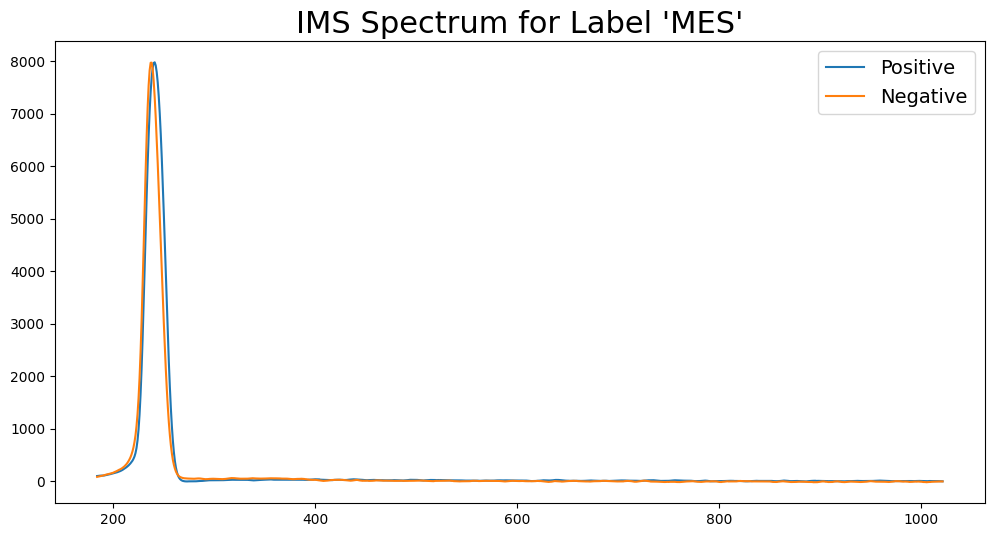

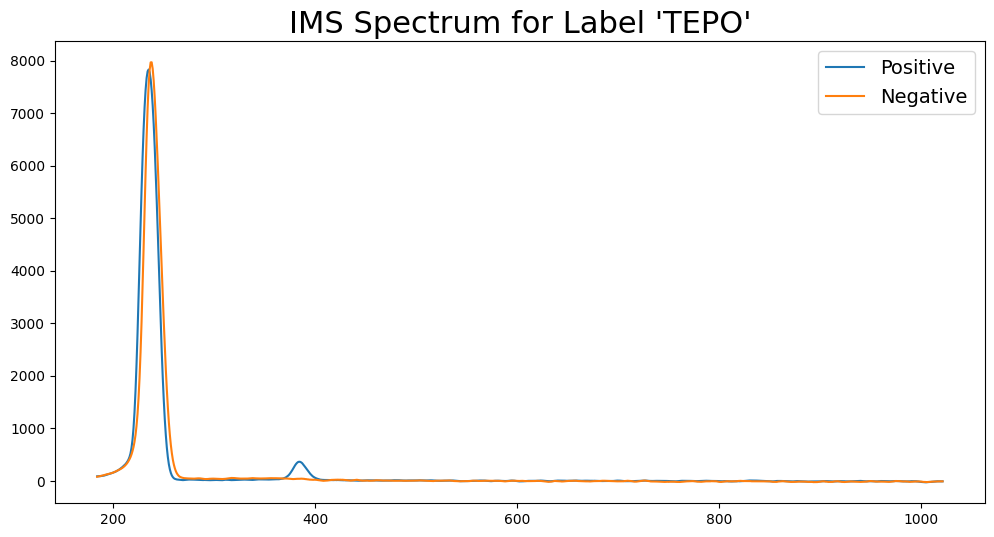

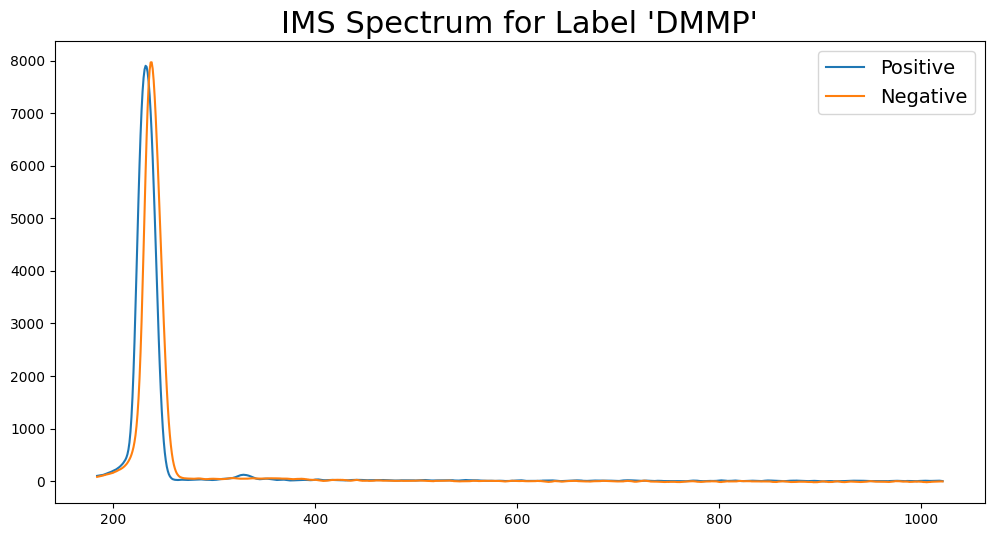

In [8]:
# Plotting spectra for a few different labels
ims_spectra_data = spectra.drop(columns=['index', 'Label'])
labels = spectra['Label']

# column names are currently in the format 'p_1234' or 'n_1234'. Separating into two lists for labeling the x-axis
x_p_vals = [int(col.split('_')[1]) for col in ims_spectra_data.columns if col.split('_')[0] == 'p']
x_n_vals = [int(col.split('_')[1]) for col in ims_spectra_data.columns if col.split('_')[0] == 'n']

plotting_indices = [0, 110000, 450000, 460000]
for idx in plotting_indices:
    plt.figure(figsize=(12, 6))
    plt.plot(x_p_vals, ims_spectra_data.iloc[idx][:len(x_p_vals)], label ='Positive')
    plt.plot(x_n_vals, ims_spectra_data.iloc[0][len(x_p_vals):], label='Negative')
    plt.title(f"IMS Spectrum for Label '{labels[idx]}'", fontsize=22)
    plt.legend(fontsize=14)
    plt.show()

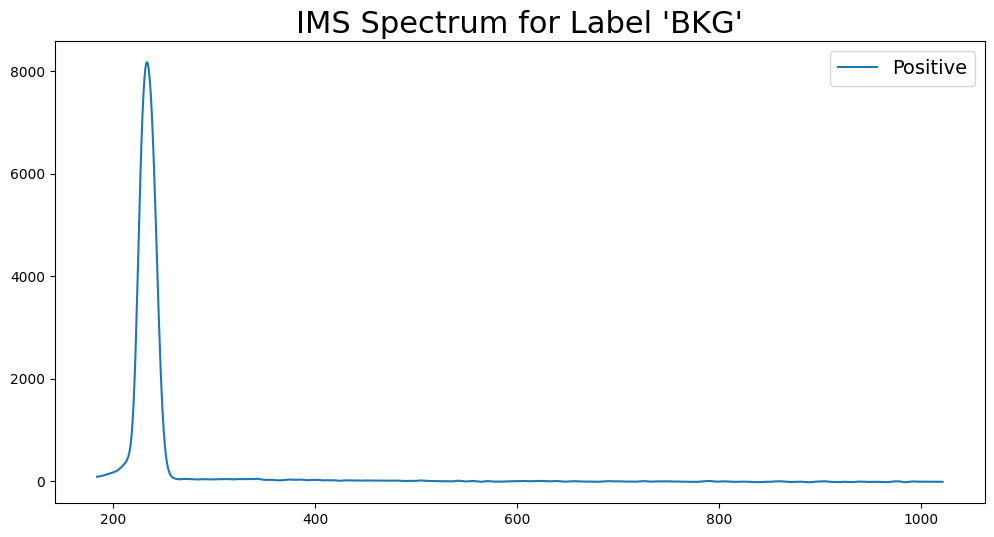

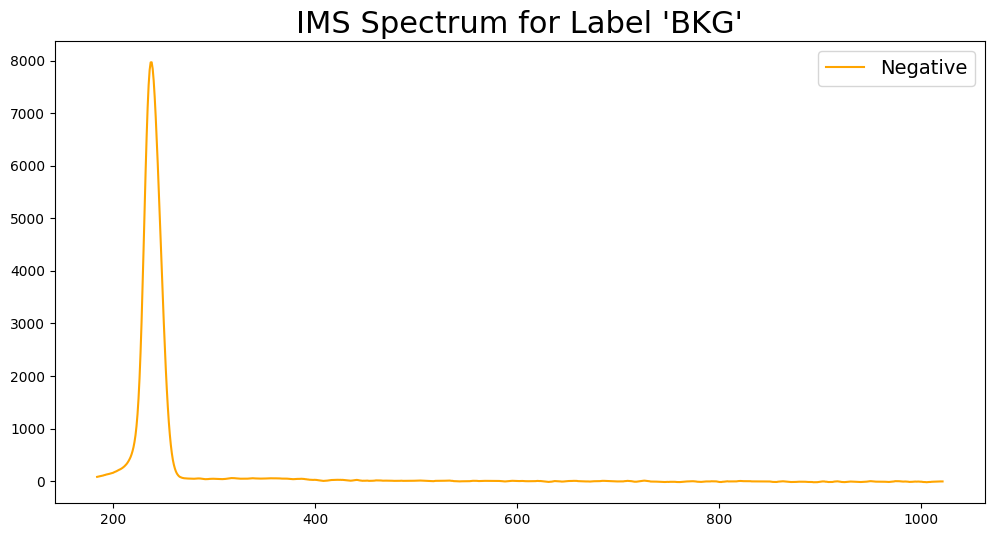

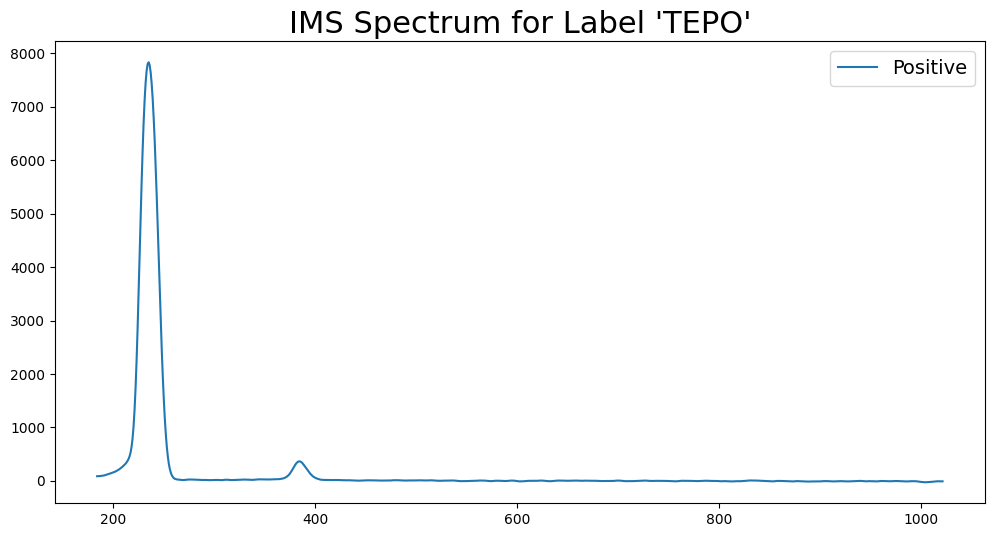

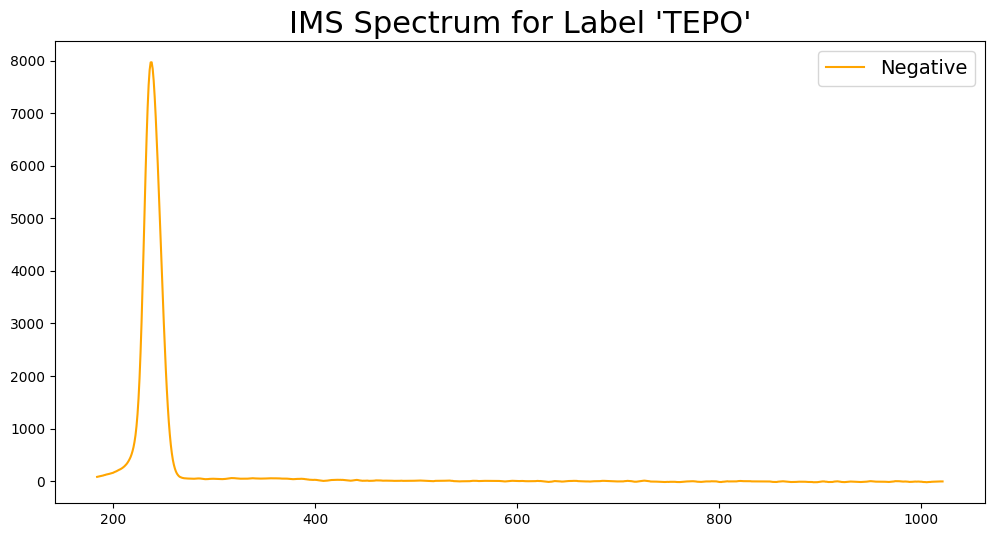

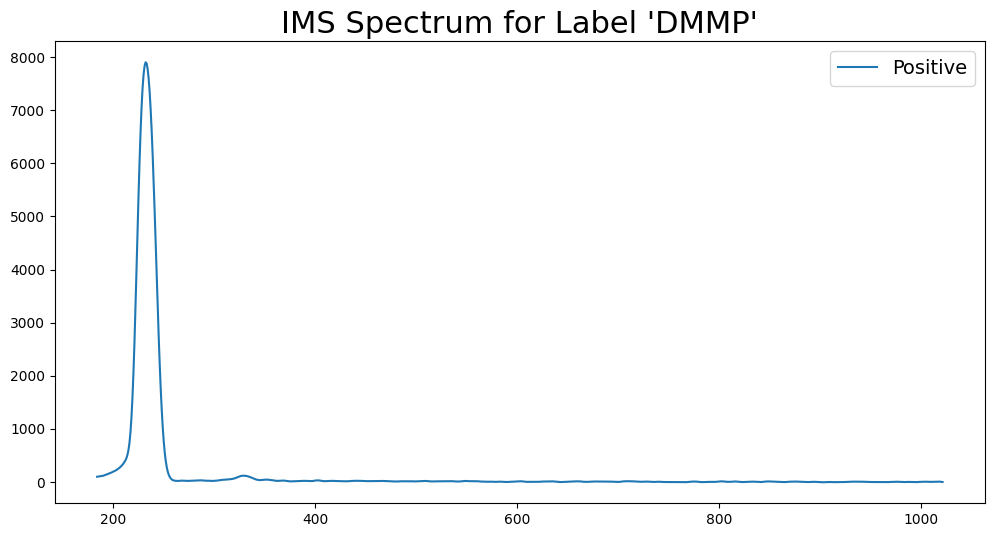

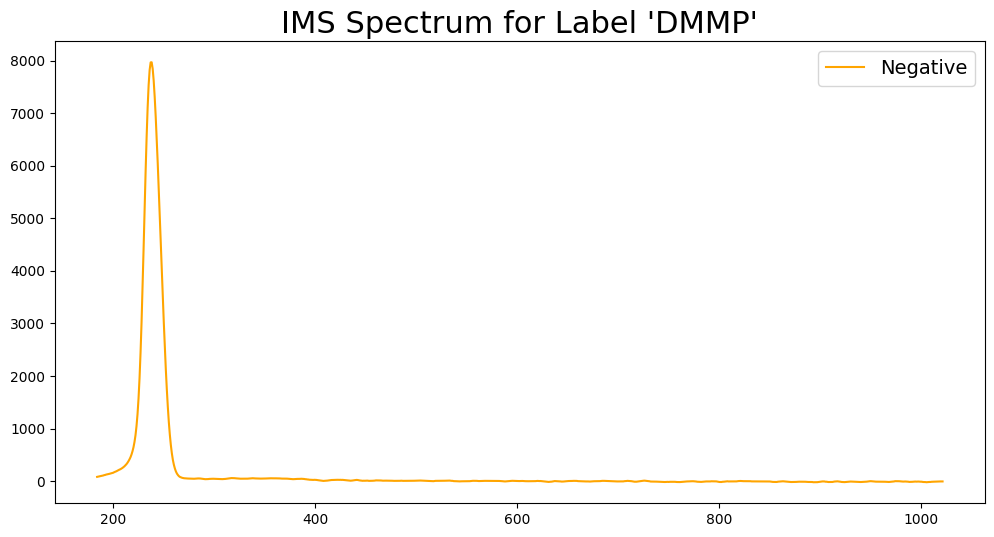

In [22]:
# Plotting spectra for a few different labels
ims_spectra_data = spectra.drop(columns=['index', 'Label'])
labels = spectra['Label']

# column names are currently in the format 'p_1234' or 'n_1234'. Separating into two lists for labeling the x-axis
x_p_vals = [int(col.split('_')[1]) for col in ims_spectra_data.columns if col.split('_')[0] == 'p']
x_n_vals = [int(col.split('_')[1]) for col in ims_spectra_data.columns if col.split('_')[0] == 'n']

plotting_indices = [0, 450000, 460000]
for idx in plotting_indices:
    plt.figure(figsize=(12, 6))
    plt.plot(x_p_vals, ims_spectra_data.iloc[idx][:len(x_p_vals)], label ='Positive')
    plt.title(f"IMS Spectrum for Label '{labels[idx]}'", fontsize=22)
    plt.legend(fontsize=14)
    plt.show()
    plt.figure(figsize=(12, 6))
    plt.plot(x_n_vals, ims_spectra_data.iloc[0][len(x_p_vals):], label='Negative', color='orange')
    plt.title(f"IMS Spectrum for Label '{labels[idx]}'", fontsize=22)
    plt.legend(fontsize=14)
    plt.show()

In [23]:
ims_spectra_data = spectra.drop(columns=['index', 'Label'])
labels = spectra['Label']

# column names are currently in the format 'p_1234' or 'n_1234'. Separating into two lists for labeling the x-axis
x_p_vals = [int(col.split('_')[1]) for col in ims_spectra_data.columns if col.split('_')[0] == 'p']
x_n_vals = [int(col.split('_')[1]) for col in ims_spectra_data.columns if col.split('_')[0] == 'n']


completed = []
for idx in range(len(labels)):
    if labels[idx] not in completed:

        print(f'Details for {labels[idx]} spectrum:')
        # all of the spectra look very similar visually. I'm curious about the differences in their highest peak locations
        highest_val = max(ims_spectra_data.iloc[idx][:len(x_p_vals)])
        higest_val_idx = list(ims_spectra_data.iloc[idx]).index(highest_val)
        print(f'  Highest p: {round(max(ims_spectra_data.iloc[idx][:len(x_p_vals)])):,} at p = {x_p_vals[higest_val_idx]}')
        # print(f'Higest val at p = {x_p_vals[higest_val_idx]}')

        print('  -----------------')

        # print(f'Highest n: {round(max(ims_spectra_data.iloc[idx][len(x_p_vals):])):,}')
        highest_val = max(ims_spectra_data.iloc[idx][:len(x_n_vals)])
        higest_val_idx = list(ims_spectra_data.iloc[idx]).index(highest_val)
        print(f'  Highest n: {round(max(ims_spectra_data.iloc[idx][len(x_p_vals):])):,} at n = {x_n_vals[higest_val_idx]}')

        print('---------------------')
        print('---------------------')

        completed.append(labels[idx])

Details for BKG spectrum:
  Highest p: 8,178 at p = 233
  -----------------
  Highest n: 7,971 at n = 233
---------------------
---------------------
Details for MES spectrum:
  Highest p: 8,037 at p = 233
  -----------------
  Highest n: 4,777 at n = 233
---------------------
---------------------
Details for DEM spectrum:
  Highest p: 5,576 at p = 229
  -----------------
  Highest n: 5,611 at n = 229
---------------------
---------------------
Details for DEB spectrum:
  Highest p: 7,936 at p = 230
  -----------------
  Highest n: 7,332 at n = 230
---------------------
---------------------
Details for JP8 spectrum:
  Highest p: 8,164 at p = 228
  -----------------
  Highest n: 6,056 at n = 228
---------------------
---------------------
Details for DPM spectrum:
  Highest p: 7,454 at p = 227
  -----------------
  Highest n: 7,478 at n = 227
---------------------
---------------------
Details for DtBP spectrum:
  Highest p: 7,774 at p = 234
  -----------------
  Highest n: 7,677 at n

# Plotting Carls:
---

In [2]:
file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/bkg.csv'
background = pd.read_csv(file_path)

file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_data.csv'
train = pd.read_csv(file_path)

In [3]:
n=6
# background_spectra = background.iloc[:,1:-1]
background_spectra = background.sample(n=n, random_state=42).iloc[:,1:-1]
background_spectra.reset_index(inplace=True)
background_spectra.drop(columns=['index'], inplace=True)

In [ ]:
chem_to_view = 'DMMP'
single_chem_train = train[train['Label'] == chem_to_view]
train_spectra = single_chem_train.iloc[:,2:-9]
train_spectra.reset_index(inplace=True)
train_spectra.drop(columns=['index'], inplace=True)

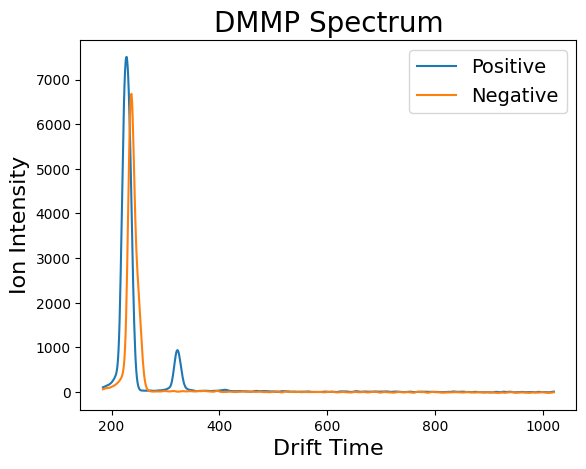

In [97]:
numbers = range(184, (train_spectra.shape[1]//2)+184)
plt.plot(numbers, train_spectra.iloc[0][:len(numbers)], label='Positive')
plt.plot(numbers, train_spectra.iloc[0][len(numbers):], label='Negative')
plt.title(f'{chem_to_view} Spectrum', fontsize=20)
plt.xlabel('Drift Time', fontsize=16)
plt.ylabel('Ion Intensity', fontsize=16)
plt.legend(fontsize=14)
plt.show()

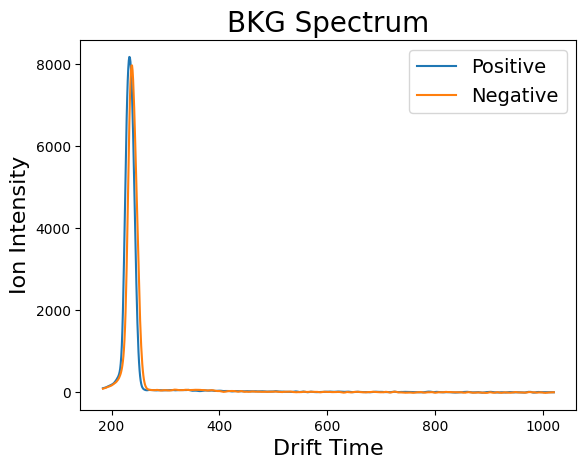

In [74]:
numbers = range(184, (train_spectra.shape[1]//2)+184)
plt.plot(numbers, background_spectra.iloc[0][:len(numbers)], label='Positive')
plt.plot(numbers, background_spectra.iloc[0][len(numbers):], label='Negative')
plt.title(f'BKG Spectrum', fontsize=20)
plt.xlabel('Drift Time', fontsize=16)
plt.ylabel('Ion Intensity', fontsize=16)
plt.legend(fontsize=14)
plt.show()

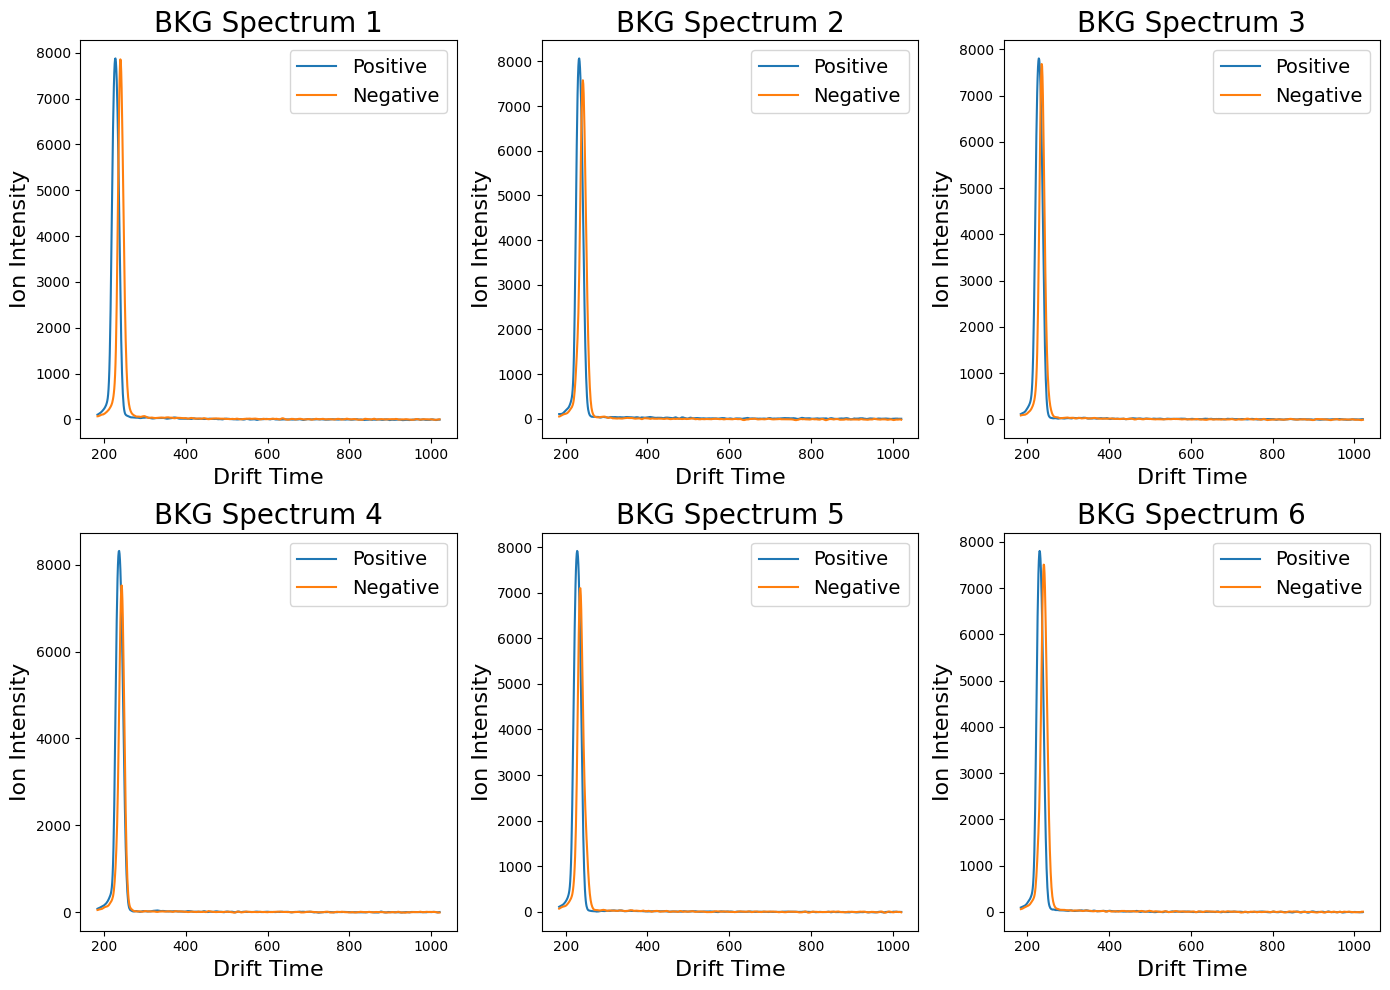

In [88]:
num_plots = n-1
cols = 3  # Number of columns for the subplots
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, row in background_spectra.iloc[:n,:].iterrows():
# for idx, row in bkg_slice.iterrows():
    numbers = range(184, (len(row)//2)+184)

    axes[idx].plot(numbers, row[:len(numbers)], label='Positive')
    axes[idx].plot(numbers, row[len(numbers):], label='Negative')
    axes[idx].set_title(f'BKG Spectrum {idx+1}', fontsize=20)
    axes[idx].set_xlabel('Drift Time', fontsize=16)
    axes[idx].set_ylabel('Ion Intensity', fontsize=16)
    axes[idx].legend(fontsize=14)

plt.tight_layout()
plt.show()

In [99]:
# looking at difference between first spec for specified chemical and first 6 background spectra 
diffs = []
spec_num_to_view = 0
for i in range(n):
    diff = train_spectra.iloc[spec_num_to_view] - background_spectra.iloc[i]
    diffs.append(diff)

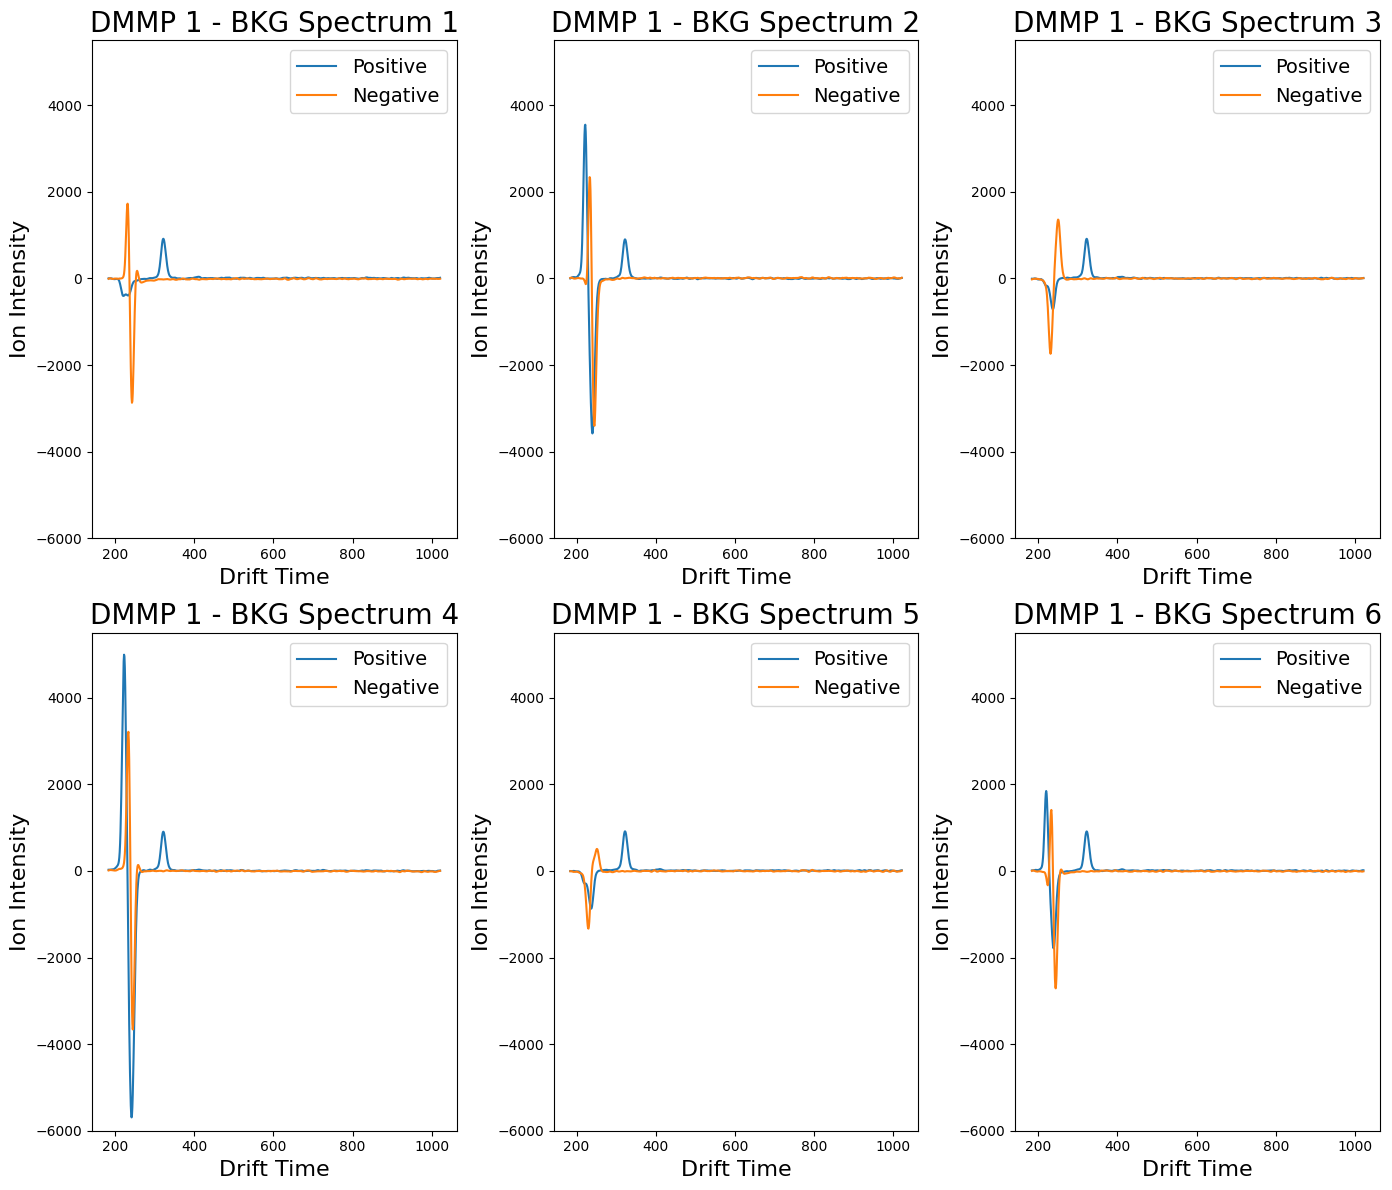

In [96]:
num_plots = len(diffs)
cols = 3  # Number of columns for the subplots
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(14, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, row in enumerate(diffs):

    # Define the x-axis range, 184 is the lowest drift time
    numbers = range(184, (len(row)//2)+184)

    axes[idx].plot(numbers, row[:len(numbers)], label='Positive')
    axes[idx].plot(numbers, row[len(numbers):], label='Negative')
    axes[idx].set_title(f'{chem_to_view} {spec_num_to_view+1} - BKG Spectrum {idx+1}', fontsize=20)
    axes[idx].set_xlabel('Drift Time', fontsize=16)
    axes[idx].set_ylim(-6000, 5500)
    axes[idx].set_ylabel('Ion Intensity', fontsize=16)
    axes[idx].legend(fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# looking at difference between first background spec and first 6 simulant spectra for specified chemical
diffs = []
spec_num_to_view = 0
for i in range(n):
    diff = train_spectra.iloc[i] - background_spectra.iloc[spec_num_to_view]
    diffs.append(diff)

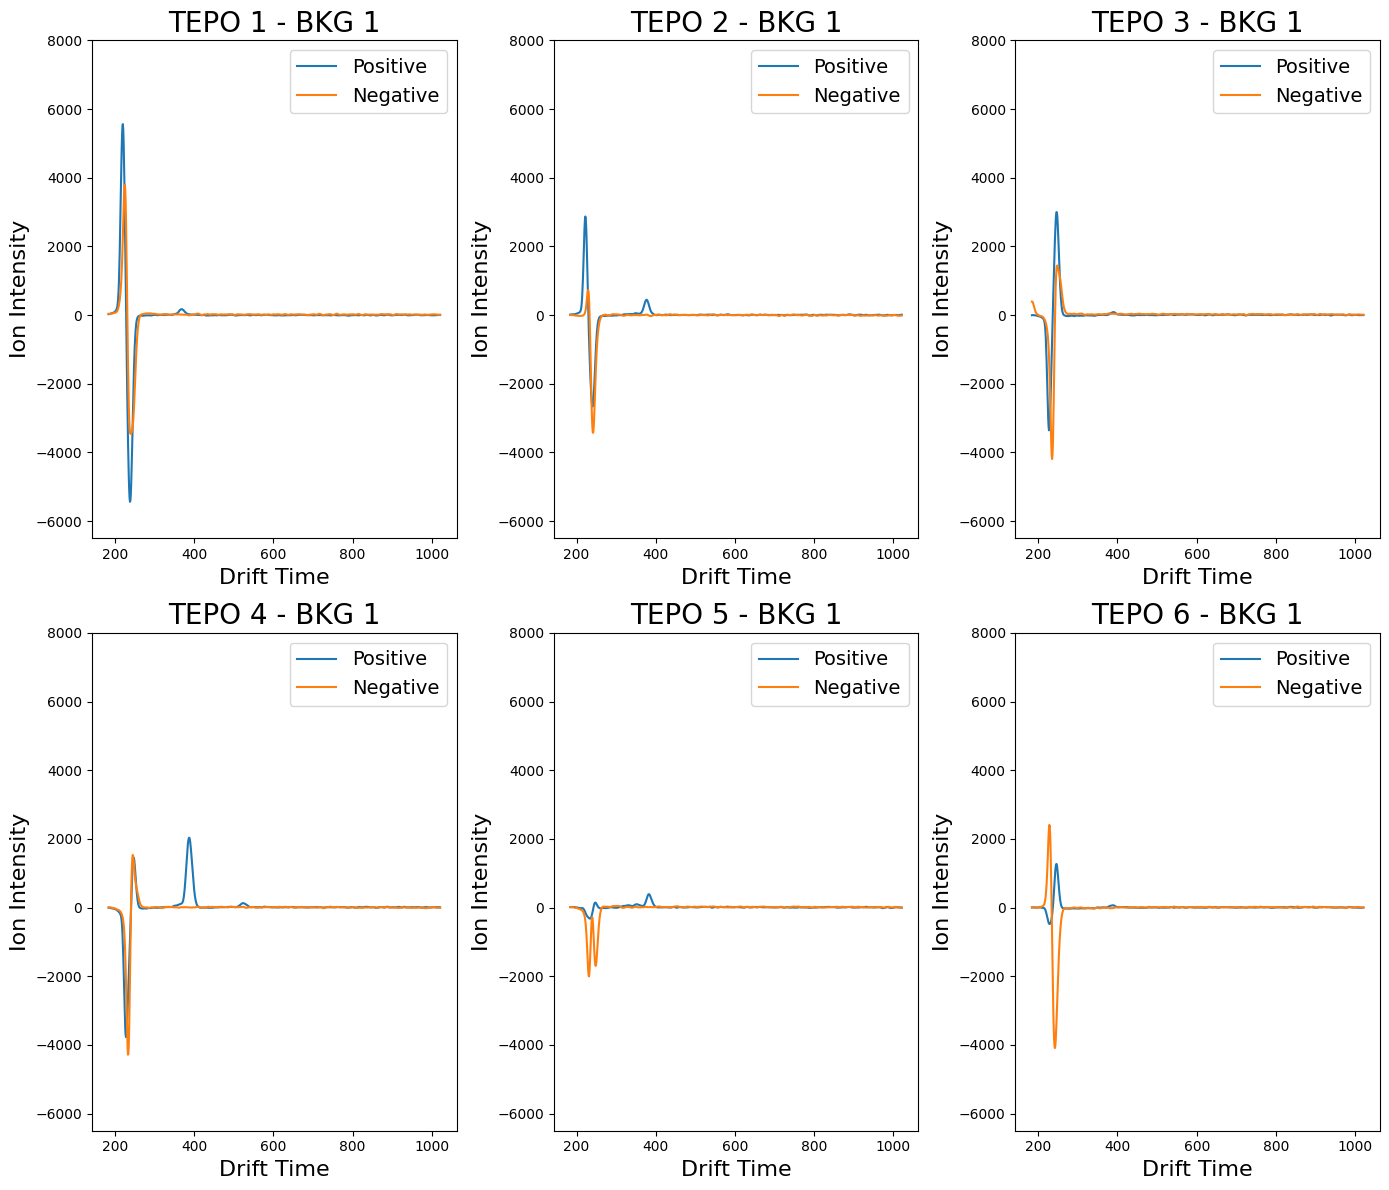

In [34]:
num_plots = len(diffs)
cols = 3  # Number of columns for the subplots
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(14, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, row in enumerate(diffs):

    # Define the x-axis range, 184 is the lowest drift time
    numbers = range(184, (len(row)//2)+184)

    axes[idx].plot(numbers, row[:len(numbers)], label='Positive')
    axes[idx].plot(numbers, row[len(numbers):], label='Negative')
    axes[idx].set_title(f'{chem_to_view} {idx+1} - BKG {spec_num_to_view+1}', fontsize=20)
    axes[idx].set_xlabel('Drift Time', fontsize=16)
    axes[idx].set_ylim(-6500, 8000)
    axes[idx].set_ylabel('Ion Intensity', fontsize=16)
    axes[idx].legend(fontsize=14)

plt.tight_layout()
plt.show()

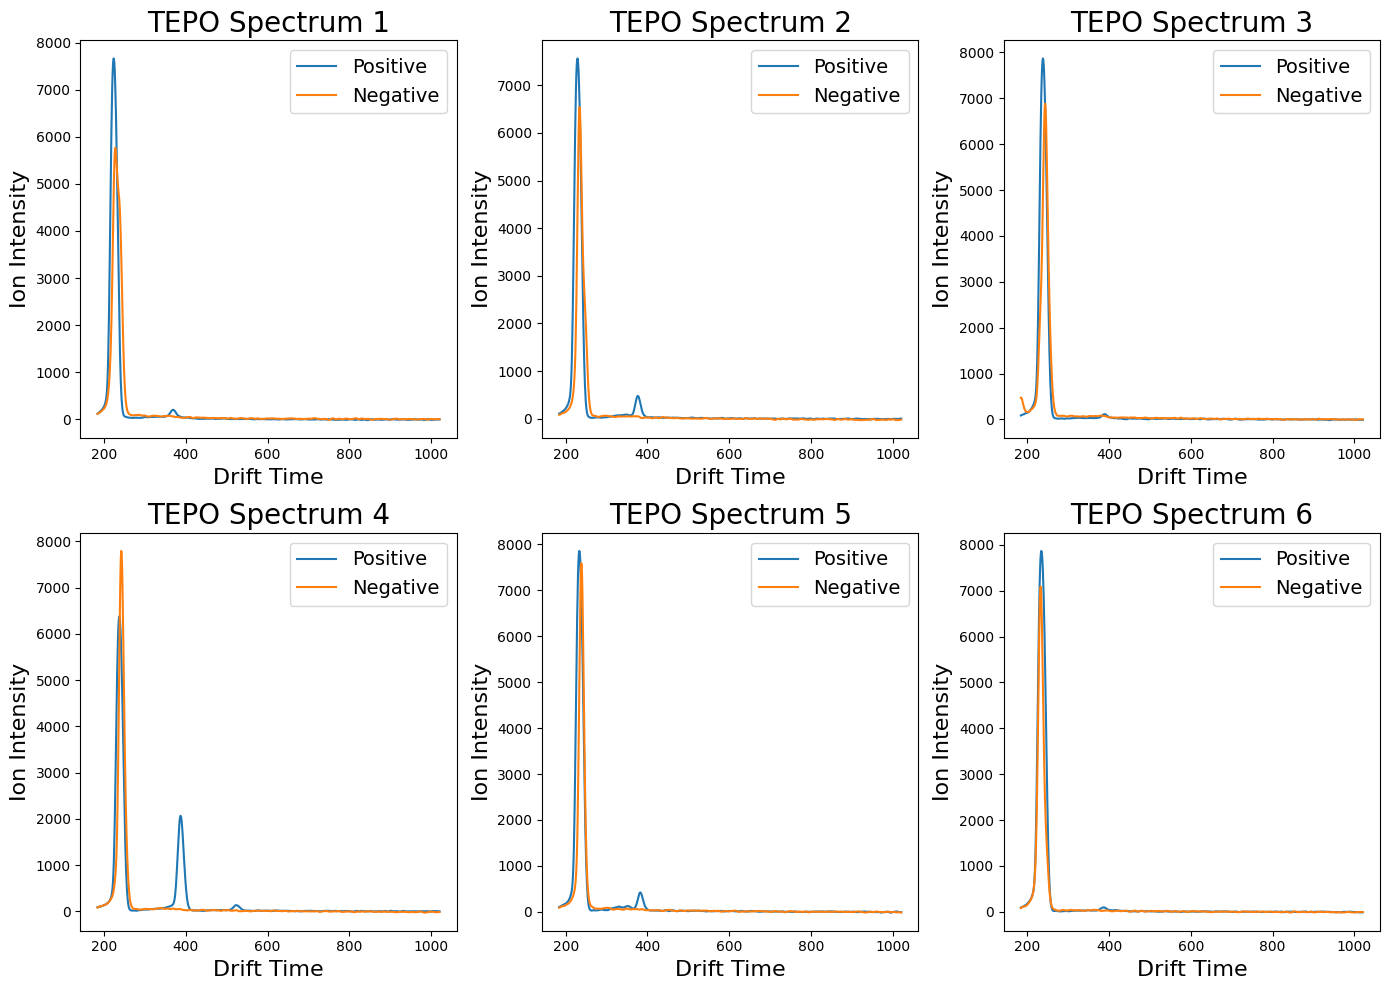

In [38]:
num_plots = n
cols = 3  # Number of columns for the subplots
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, row in train_spectra.iloc[:n,:].iterrows():

    numbers = range(184, (len(row)//2)+184)

    axes[idx].plot(numbers, row[:len(numbers)], label='Positive')
    axes[idx].plot(numbers, row[len(numbers):], label='Negative')
    axes[idx].set_title(f'{chem_to_view} Spectrum {idx+1}', fontsize=20)
    axes[idx].set_xlabel('Drift Time', fontsize=16)
    axes[idx].set_ylabel('Ion Intensity', fontsize=16)
    axes[idx].legend(fontsize=14)

plt.tight_layout()
plt.show()

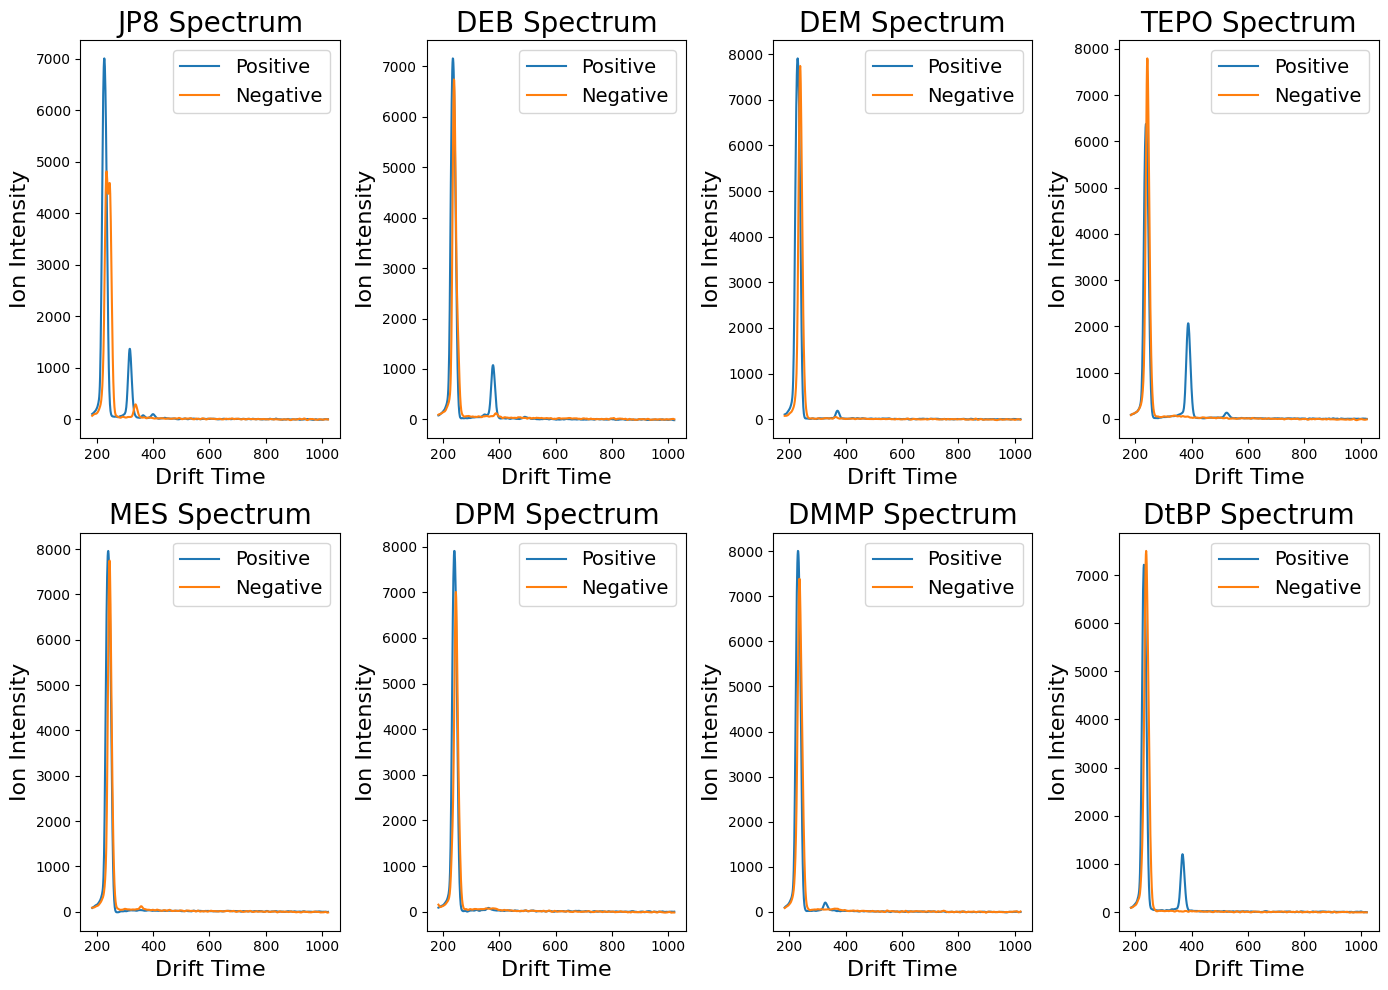

In [52]:
num_plots = n
cols = 4  # Number of columns for the subplots
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

chems = list(set(train['Label']))
for idx, chem in enumerate(chems):
    row = train[train['Label'] == chem].iloc[idx, 2:-9]

    numbers = range(184, (len(row)//2)+184)

    axes[idx].plot(numbers, row[:len(numbers)], label='Positive')
    axes[idx].plot(numbers, row[len(numbers):], label='Negative')
    # axes[idx].set_title(f'{chems[idx]} Spectrum {spec_num_to_view+1}', fontsize=20)
    axes[idx].set_title(f'{chems[idx]} Spectrum', fontsize=20)
    axes[idx].set_xlabel('Drift Time', fontsize=16)
    axes[idx].set_ylabel('Ion Intensity', fontsize=16)
    axes[idx].legend(fontsize=14)

plt.tight_layout()
plt.show()

In [39]:
# looking at diffs between nth bkg spec and nth spec for each simulant
diffs = []
spec_num_to_view = 0
chems = list(set(train['Label']))
for chem in chems:
    diff = train[train['Label'] == chem].iloc[spec_num_to_view, 2:-9] - background_spectra.iloc[spec_num_to_view]
    diffs.append(diff)

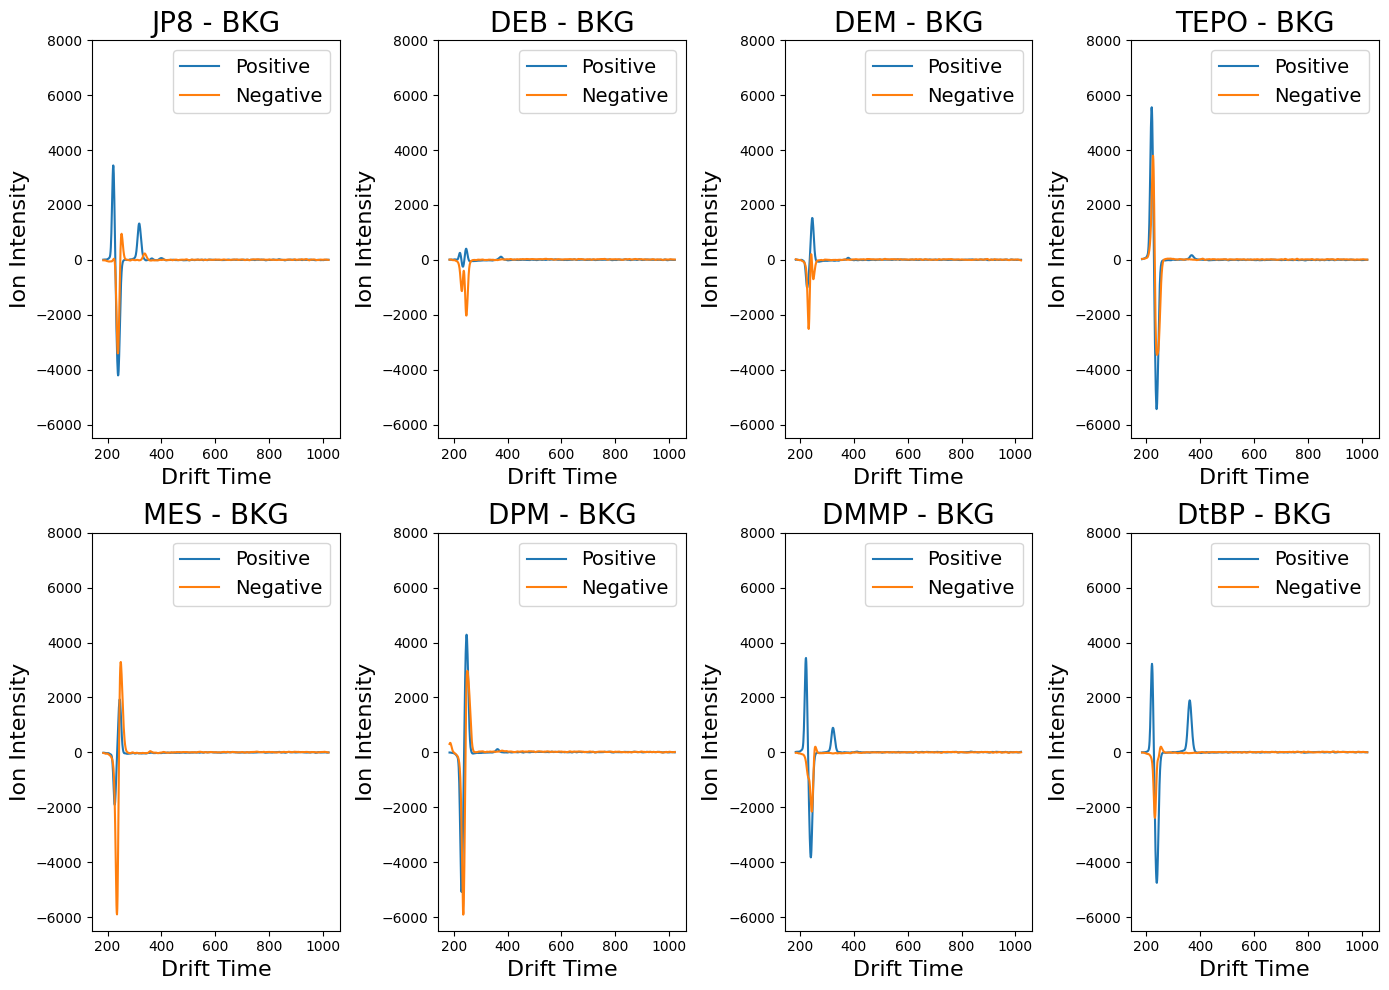

In [51]:
num_plots = len(diffs)
cols = 4  # Number of columns for the subplots
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, row in enumerate(diffs):

    # Define the x-axis range, 184 is the lowest drift time
    numbers = range(184, (len(row)//2)+184)

    axes[idx].plot(numbers, row[:len(numbers)], label='Positive')
    axes[idx].plot(numbers, row[len(numbers):], label='Negative')
    # axes[idx].set_title(f'{chems[idx]} {spec_num_to_view+1} - BKG {spec_num_to_view+1}', fontsize=20)
    axes[idx].set_title(f'{chems[idx]} - BKG', fontsize=20)
    axes[idx].set_xlabel('Drift Time', fontsize=16)
    axes[idx].set_ylim(-6500, 8000)
    axes[idx].set_ylabel('Ion Intensity', fontsize=16)
    axes[idx].legend(fontsize=14)

plt.tight_layout()
plt.show()

## Carl PCA:
---

In [7]:
n=2
background_spectra = background.sample(n=n, random_state=42).iloc[:,1:-1]
background_spectra.reset_index(inplace=True)
background_spectra.drop(columns=['index'], inplace=True)

train_spectra = train.iloc[:,2:-9]
train_spectra.reset_index(inplace=True)
train_spectra.drop(columns=['index'], inplace=True)

diffs = []

for _, row in train_spectra.iterrows():
    for i in range(n):
        diff = row - background_spectra.iloc[i]
        diffs.append(diff)

In [ ]:
train_carl_df = pd.DataFrame(diffs)
train_carl_df.reset_index(inplace=True)
train_carl_df.drop(columns=['index'], inplace=True)

file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_carls.csv'
train_carl_df.to_csv(file_path)

In [8]:
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_carls.csv'
# train_carls = pd.read_csv(file_path)
# train_carls.head()

# Look at Train Metadata:
---

In [22]:
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_data.csv'
# train = pd.read_csv(file_path)

In [ ]:
def plot_pca(data, chemical_names):
    """
    Plots the PCA of given data and visualizes the results in a 2D 
    scatter plot. Each point in the plot represents a spectrum, 
    colored according to its associated chemical name.

    Parameters:
    ----------
    data : array-like, shape (n_samples, n_features)
        A 2D array of spectral data where each row corresponds to a sample and 
        each column corresponds to a feature.

    chemical_names : list of str, len (n_samples)
        A list of chemical names corresponding to each sample.

    Returns:
    -------
    None : The function displays a scatter plot and does not return any value.
    """

    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(data)

    # Create a color map where each chemical name is assigned a unique integer
    unique_chemical_names = list(set(chemical_names))
    color_map = {chem: idx for idx, chem in enumerate(unique_chemical_names)}

    # Map chemical names to their respective colors 
    colors = [color_map[chem] for chem in chemical_names]

    # Extract the x and y coordinates from the transformed spectra
    true_x = [pair[0] for pair in transformed_data]
    true_y = [pair[1] for pair in transformed_data]
    scatter = plt.scatter(true_x, true_y, c=colors, cmap='tab20')

    # Add a legend to the plot
    plt.legend(handles=scatter.legend_elements()[0],
                labels=unique_chemical_names,
                loc='upper right',
                prop={'size':7})

    plt.title('Metadata PCA', fontsize=20)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
# create list of sample names
chem_names = list(metadata['Label'])

# create df of just numeric features from the metadata df
numeric_features = [col for col in metadata.columns if metadata[col].dtype == np.float64]
cols = list(metadata.columns)
start_idx = cols.index(numeric_features[0])
end_idx = cols.index(numeric_features[-1])
numeric_features_df = metadata.iloc[:,start_idx:end_idx]

numeric_features_df.fillna(0, inplace=True)
numeric_features_df.head()

,TemperatureKelvin,PressureBar,PosPeak1Mobility,PosPeak2Mobility,PosPeak3Mobility,PosPeak1Amplitude,PosPeak2Amplitude,PosPeak3Amplitude,NegPeak1Mobility,NegPeak2Mobility,NegPeak3Mobility,NegPeak1Amplitude,NegPeak2Amplitude
0,0.0,1019.5,2.290,0.0,0.0,7776.0,0.0,0.0,2.129,0.0,0.0,7279.0,0.0
1,0.0,1020.3,2.283,0.0,0.0,7530.0,0.0,0.0,2.118,0.0,0.0,7062.0,0.0
2,0.0,1019.5,2.291,0.0,0.0,7690.0,0.0,0.0,2.130,0.0,0.0,7317.0,0.0
3,0.0,1019.5,2.291,0.0,0.0,7796.0,0.0,0.0,2.129,0.0,0.0,7312.0,0.0
4,0.0,1019.2,2.289,0.0,0.0,7682.0,0.0,0.0,2.128,0.0,0.0,7373.0,0.0
